In [27]:
from Models_Util import *

## Reading input

In [7]:
math_problems = pd.read_csv("../Data/GT_GPT.csv", index_col=0)
math_problems.head()

,Unnamed: 0,problem,level_x,type,modified_problem,no_of_equations,no_of_variables,has_mod,has_logarithm,has_fraction,...,number_of_digits,number_of_numbers,has_digits,has_symbol,symbol_count,has_exp,no_of_exps,has_pow,no_of_pow,gpt_val
0,0,Kevin Kangaroo begins hopping on a number line...,Level 5,3,Kevin Kangaroo begins hopping on a number line...,2,1,False,False,True,...,2,2,True,False,0,False,0,False,0,2
1,1,The ratio of the areas of two squares is $\fra...,Level 4,3,The ratio of the areas of two squares is . Aft...,3,5,False,False,True,...,0,0,False,True,2,False,0,True,1,3
2,2,"If $\sqrt{2\sqrt{t-2}} = \sqrt[4]{7 - t}$, the...",Level 4,3,"If , then find .",1,2,False,False,False,...,4,4,True,True,2,False,0,True,3,4
3,3,Let $t(x) = \sqrt{3x+1}$ and $f(x)=5-t(x)$. Wh...,Level 4,3,Let and . What is ?,3,3,False,False,False,...,1,1,True,False,0,False,0,True,1,3
4,4,James has a total of 66 dollars in his piggy b...,Level 2,3,James has a total of 66 dollars in his piggy b...,0,0,False,False,False,...,0,0,False,False,0,False,0,False,0,2


In [8]:
size_mapping = {"Prealgebra": 1, "Intermediate Algebra": 2, "Algebra": 3}
math_problems['type'] = math_problems['type'].replace(size_mapping)

In [ ]:
# Initialising the metrics dataframe
scores = pd.DataFrame(columns=['Model','F1_train','F1_test'])

## Experiment 1: 

Consider the following features

1. Categorised linguistic features
2. Categorical math features (eg: has_exp, has_log)
3. no_of_equations
4. no_of_variables

Run Random forest for the default 5 level classification and report the results

In [10]:
data1 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_CAT_FEATURES + MANDATORY_FEATURES + TARGET_FEATURE]

int64
Class distribution before SMOTE: Counter({5: 348, 4: 316, 3: 313, 2: 269, 1: 142})
Class distribution after SMOTE: Counter({5: 348, 4: 348, 3: 348, 1: 348, 2: 348})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.4517241379310345
train_evaluation:

              precision    recall  f1-score   support

           1       0.89      0.64      0.74       482
           2       0.57      0.61      0.59       325
           3       0.57      0.65      0.61       310
           4       0.55      0.70      0.61       270
           5       0.72      0.71      0.72       353

    accuracy                           0.66      1740
   macro avg       0.66      0.66      0.65      1740
weighted avg       0.69      0.66      0.67      1740

[[308  77  42  40  15]
 [ 15 199  51  33  27]
 [ 15  29 200  36  30]
 [  4  23  28 190  25]
 [  6  20  27  49 251]]

test_evaluation:

        

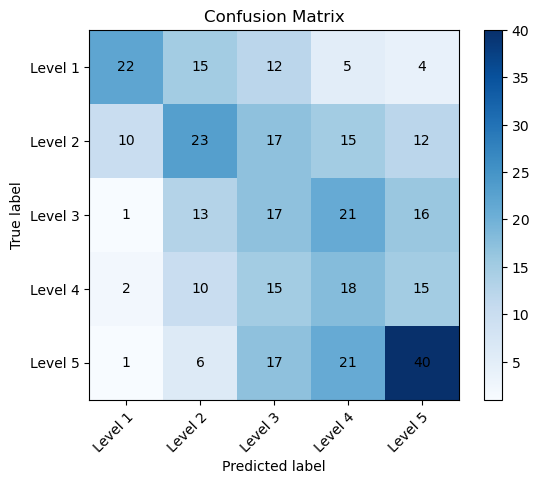

Feature Importance Rankings:
1. no_of_variables: 15.839342356939277
2. large_words_cat: 13.449864298207718
3. word_count_cat: 12.946360211784164
4. no_of_equations: 10.69616943719976
5. words_per_sentence_cat: 10.128456138121516
6. has_symbol: 7.339486553553722
7. average_word_length_cat: 6.338879744948597
8. has_pow: 5.626139342816255
9. sentence_count_cat: 4.649236103195515
10. has_fraction: 3.0793253012211212
11. has_digits: 2.9201579894126617
12. has_eq: 2.7357605529143703
13. has_neq: 1.7379000477749187
14. has_logarithm: 1.5074392409128767
15. has_mod: 1.0054826809975237
16. has_exp: 0.0
17. type: 0.0


In [24]:
scores = rf_model(data1, scores=scores, experiment="Experiment1+SMOTE")

In [25]:
scores

,Model,F1_train,F1_test
0,Experiment1+SMOTE,0.654492,0.337514


int64
Best Parameters:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.35445549697426176
train_evaluation:

              precision    recall  f1-score   support

           1       0.88      0.52      0.65       240
           2       0.63      0.64      0.63       266
           3       0.62      0.75      0.68       261
           4       0.65      0.75      0.69       273
           5       0.79      0.79      0.79       348

    accuracy                           0.70      1388
   macro avg       0.71      0.69      0.69      1388
weighted avg       0.71      0.70      0.70      1388

[[125  50  33  26   6]
 [ 10 169  41  25  21]
 [  3  20 195  25  18]
 [  2  15  24 204  28]
 [  2  15  20  36 275]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.58      0.32      0.42        65
           2       0.36      0.29  

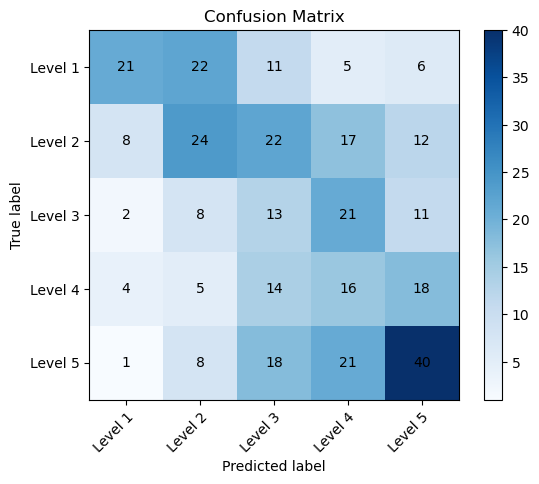

Feature Importance Rankings:
1. no_of_variables: 15.41607931224885
2. large_words_cat: 12.306523474028475
3. word_count_cat: 11.789765062615082
4. no_of_equations: 11.412782626745832
5. words_per_sentence_cat: 10.22190158940828
6. average_word_length_cat: 7.7396372294989275
7. has_symbol: 6.7023038716451335
8. has_pow: 5.62529463350121
9. sentence_count_cat: 4.629581839690303
10. has_fraction: 3.879896822984573
11. has_digits: 3.1747287751296698
12. has_eq: 2.6528649633293924
13. has_neq: 2.0047319824453695
14. has_logarithm: 1.3589925722458014
15. has_mod: 1.0849152444831005
16. has_exp: 0.0
17. type: 0.0


In [274]:
scores = rf_model(data1, use_smote_technique=0, scores=scores, experiment="Experiment1")

In [275]:
scores

,Model,F1_train,F1_test
0,Experiment1+SMOTE,0.654492,0.337514
1,Experiment1,0.698442,0.316425


int64
Class distribution before SMOTE: Counter({3: 548, 2: 525, 4: 212, 1: 61, 5: 42})
Class distribution after SMOTE: Counter({2: 548, 3: 548, 4: 548, 5: 548, 1: 548})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.5850364963503649
train_evaluation:

              precision    recall  f1-score   support

           1       0.89      0.70      0.78       700
           2       0.54      0.67      0.59       442
           3       0.55      0.72      0.62       416
           4       0.67      0.73      0.70       503
           5       0.93      0.75      0.83       679

    accuracy                           0.72      2740
   macro avg       0.72      0.71      0.71      2740
weighted avg       0.75      0.72      0.73      2740

[[489  94  56  55   6]
 [ 18 294  69  49  12]
 [  8  71 299  31   7]
 [ 17  38  68 369  11]
 [ 16  51  56  44 512]]

test_evaluation:

          

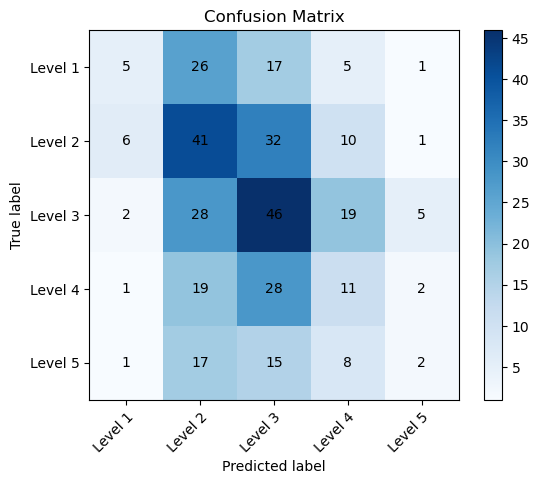

Feature Importance Rankings:
1. no_of_variables: 16.996145429400393
2. large_words_cat: 12.173512552239428
3. words_per_sentence_cat: 10.404471853419608
4. no_of_equations: 10.309279625738768
5. word_count_cat: 9.276563424199093
6. has_symbol: 8.558972697702728
7. has_pow: 7.485788449064142
8. average_word_length_cat: 6.325637848864071
9. has_fraction: 4.215811771892102
10. has_eq: 4.114331272098326
11. sentence_count_cat: 3.9861580115297843
12. has_digits: 3.448000629753714
13. has_neq: 1.130155153227335
14. has_logarithm: 0.8120033331523575
15. has_mod: 0.7631679477181508
16. has_exp: 0.0
17. type: 0.0


In [280]:
data1 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_CAT_FEATURES + MANDATORY_FEATURES + GPT_5_TARGET_FEATURE]

scores = rf_model(data1, target_feature=GPT_5_TARGET_FEATURE[0], scores=scores, experiment="Experiment1+GPT+SMOTE")

In [281]:
scores

,Model,F1_train,F1_test
0,Experiment1+SMOTE,0.654492,0.337514
1,Experiment1,0.698442,0.316425
2,Experiment1+GPT+SMOTE,0.706934,0.330942


int64
Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.3602420590603329
train_evaluation:

              precision    recall  f1-score   support

           1       0.87      0.31      0.46       170
           2       0.70      0.76      0.73       485
           3       0.63      0.84      0.72       411
           4       0.75      0.64      0.69       249
           5       0.86      0.49      0.63        73

    accuracy                           0.69      1388
   macro avg       0.76      0.61      0.65      1388
weighted avg       0.72      0.69      0.68      1388

[[ 53  60  41  14   2]
 [  4 368  92  20   1]
 [  1  52 344  13   1]
 [  2  29  56 160   2]
 [  1  16  15   5  36]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.13      0.04      0.06        48
           2       0.40   

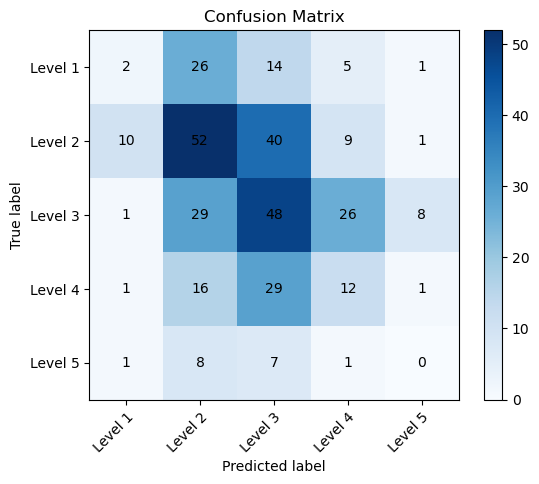

Feature Importance Rankings:
1. no_of_variables: 14.843315082164004
2. large_words_cat: 12.304504748086416
3. words_per_sentence_cat: 11.039292613348668
4. word_count_cat: 10.50889816697746
5. no_of_equations: 9.999234093183409
6. has_pow: 7.885268396542819
7. average_word_length_cat: 7.648251955555482
8. sentence_count_cat: 5.488245555952093
9. has_fraction: 4.989570497825616
10. has_symbol: 4.855795059015551
11. has_digits: 3.6236697233985358
12. has_eq: 3.4241502560501416
13. has_neq: 1.8103669827730768
14. has_logarithm: 0.8328144295975396
15. has_mod: 0.7466224395291917
16. has_exp: 0.0
17. type: 0.0


In [284]:
scores = rf_model(data1, use_smote_technique=0, target_feature=GPT_5_TARGET_FEATURE[0], scores=scores, experiment="Experiment1+GPT")

In [286]:
scores

,Model,F1_train,F1_test
0,Experiment1+SMOTE,0.654492,0.337514
1,Experiment1,0.698442,0.316425
2,Experiment1+GPT+SMOTE,0.706934,0.330942
3,Experiment1+GPT,0.704008,0.348757


## Experiment 2: 

Consider the following features

1. Categorised linguistic features
2. All numerical math features

Run Random forest with default 5 class classification and report the results

In [285]:
data2 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_NUM_FEATURES + MANDATORY_FEATURES + TARGET_FEATURE]

int64
Class distribution before SMOTE: Counter({5: 348, 4: 316, 3: 313, 2: 269, 1: 142})
Class distribution after SMOTE: Counter({5: 348, 4: 348, 3: 348, 1: 348, 2: 348})
Best Parameters:  {'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.4505747126436782
train_evaluation:

              precision    recall  f1-score   support

           1       0.89      0.70      0.78       446
           2       0.61      0.70      0.65       303
           3       0.62      0.68      0.65       321
           4       0.60      0.75      0.67       277
           5       0.78      0.69      0.74       393

    accuracy                           0.70      1740
   macro avg       0.70      0.70      0.70      1740
weighted avg       0.72      0.70      0.71      1740

[[310  64  36  29   7]
 [ 16 212  32  27  16]
 [  9  33 217  29  33]
 [  7  16  27 208  19]
 [  6  23  36  55 273]]

test_evaluation:

           

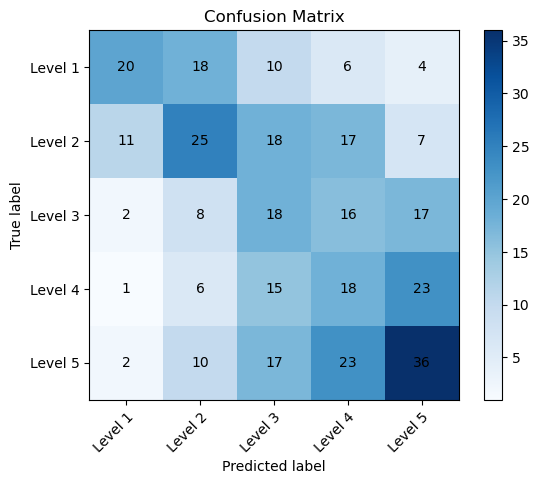

Feature Importance Rankings:
1. large_words_cat: 12.371961776041205
2. word_count_cat: 9.843637522727882
3. no_of_variables: 9.761850447275586
4. symbol_count: 8.61274167277922
5. words_per_sentence_cat: 7.896125518401291
6. max_degree_of_equations: 7.350001924317315
7. number_of_digits: 7.231159618800856
8. no_of_equations: 7.109439325563048
9. number_of_numbers: 6.828140831375945
10. no_of_pow: 5.63103121305463
11. average_word_length_cat: 5.023106725446912
12. sentence_count_cat: 3.7105537632009056
13. fracs_count: 3.0769464440292325
14. eqlts_count: 2.735730697396838
15. neqlts_count: 1.3404136440274894
16. log_count: 0.9383692354867033
17. mod_count: 0.5387896400749339
18. no_of_exps: 0.0
19. type: 0.0


In [287]:
scores = rf_model(data2, scores=scores, experiment="Experiment2+SMOTE")

int64
Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.3638080149598733
train_evaluation:

              precision    recall  f1-score   support

           1       0.92      0.57      0.71       228
           2       0.62      0.77      0.69       218
           3       0.71      0.71      0.71       316
           4       0.62      0.79      0.70       249
           5       0.83      0.77      0.80       377

    accuracy                           0.73      1388
   macro avg       0.74      0.72      0.72      1388
weighted avg       0.75      0.73      0.73      1388

[[131  41  27  22   7]
 [  3 168  19  18  10]
 [  3  29 223  33  28]
 [  4  15  19 197  14]
 [  1  16  25  46 289]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.53      0.33      0.41        57
           2       0.27      

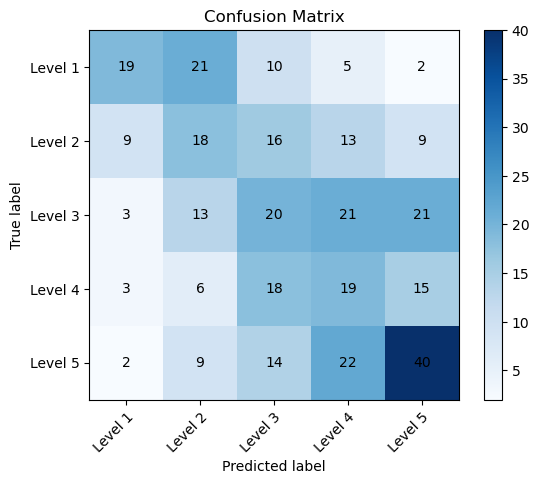

Feature Importance Rankings:
1. large_words_cat: 10.990138401898268
2. word_count_cat: 9.985686768456693
3. number_of_digits: 8.577796357026807
4. no_of_variables: 8.457028570689493
5. max_degree_of_equations: 8.261682944472975
6. symbol_count: 8.10026930368751
7. words_per_sentence_cat: 7.955826825059105
8. no_of_equations: 6.895295294647674
9. number_of_numbers: 6.70972739789279
10. no_of_pow: 5.532682158293777
11. average_word_length_cat: 5.104461014554226
12. sentence_count_cat: 3.9291796533296965
13. fracs_count: 3.4287773488992173
14. eqlts_count: 2.813525994309651
15. neqlts_count: 1.390465688971918
16. mod_count: 1.1252440600525124
17. log_count: 0.7422122177576842
18. no_of_exps: 0.0
19. type: 0.0


In [288]:
scores = rf_model(data2, use_smote_technique=0, scores=scores, experiment="Experiment2")

In [289]:
scores

,Model,F1_train,F1_test
0,Experiment1+SMOTE,0.654492,0.337514
1,Experiment1,0.698442,0.316425
2,Experiment1+GPT+SMOTE,0.706934,0.330942
3,Experiment1+GPT,0.704008,0.348757
4,Experiment2+SMOTE,0.696667,0.329190
5,Experiment2,0.724699,0.329146


In [291]:
data2 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_NUM_FEATURES + MANDATORY_FEATURES + GPT_5_TARGET_FEATURE]

int64
Class distribution before SMOTE: Counter({3: 548, 2: 525, 4: 212, 1: 61, 5: 42})
Class distribution after SMOTE: Counter({2: 548, 3: 548, 4: 548, 5: 548, 1: 548})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.5952554744525548
train_evaluation:

              precision    recall  f1-score   support

           1       0.96      0.70      0.81       750
           2       0.68      0.77      0.72       482
           3       0.63      0.85      0.72       404
           4       0.75      0.80      0.78       517
           5       0.94      0.88      0.91       587

    accuracy                           0.79      2740
   macro avg       0.79      0.80      0.79      2740
weighted avg       0.82      0.79      0.80      2740

[[527  93  46  59  25]
 [ 11 370  69  29   3]
 [  2  40 344  18   0]
 [  8  30  61 413   5]
 [  0  15  28  29 515]]

test_evaluation:

          

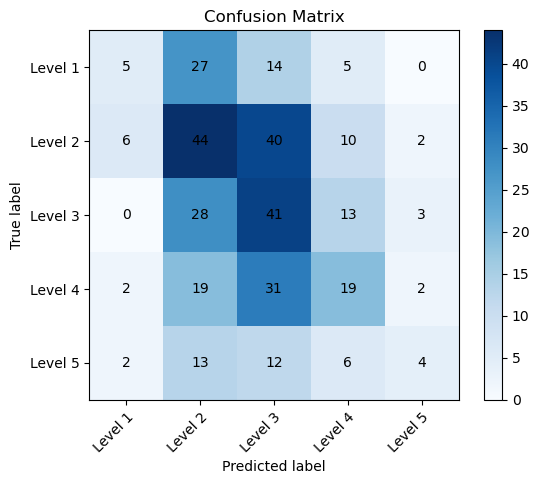

Feature Importance Rankings:
1. large_words_cat: 10.795893048973682
2. words_per_sentence_cat: 10.752322633928912
3. no_of_variables: 10.360114135599837
4. number_of_digits: 9.725511133051997
5. symbol_count: 7.604931398827923
6. no_of_equations: 7.561239411965266
7. number_of_numbers: 7.362086573000842
8. word_count_cat: 6.689760617925159
9. no_of_pow: 6.619784843166896
10. max_degree_of_equations: 6.489853993152509
11. average_word_length_cat: 5.353673816916546
12. fracs_count: 3.9296573139491904
13. sentence_count_cat: 3.1014468138853992
14. eqlts_count: 2.0186972769848253
15. neqlts_count: 0.8325791470163993
16. mod_count: 0.630242845326871
17. log_count: 0.17220499632774997
18. no_of_exps: 0.0
19. type: 0.0


In [292]:
scores = rf_model(data2, target_feature=GPT_5_TARGET_FEATURE[0], scores=scores, experiment="Experiment2+GPT+SMOTE")

int64
Best Parameters:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.38761135495935384
train_evaluation:

              precision    recall  f1-score   support

           1       0.87      0.37      0.51       145
           2       0.74      0.77      0.75       502
           3       0.70      0.85      0.76       452
           4       0.76      0.70      0.73       230
           5       0.95      0.68      0.79        59

    accuracy                           0.74      1388
   macro avg       0.80      0.67      0.71      1388
weighted avg       0.75      0.74      0.73      1388

[[ 53  57  26   9   0]
 [  6 387  86  22   1]
 [  2  51 382  17   0]
 [  0  25  43 161   1]
 [  0   5  11   3  40]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.13      0.06      0.08        36
           2       0.50      0.50  

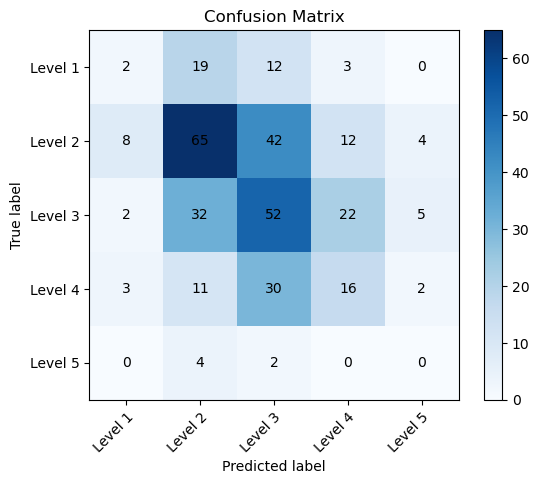

Feature Importance Rankings:
1. words_per_sentence_cat: 10.241449522804581
2. no_of_variables: 10.069784140914718
3. number_of_digits: 9.012793762956086
4. no_of_pow: 8.580852894242517
5. large_words_cat: 8.227052656036742
6. symbol_count: 8.205187062874668
7. max_degree_of_equations: 7.332434901242543
8. no_of_equations: 6.878188042794951
9. word_count_cat: 6.82599347552302
10. number_of_numbers: 6.309195165274366
11. average_word_length_cat: 5.221960229991941
12. sentence_count_cat: 4.31533751311565
13. fracs_count: 3.7555961829651263
14. eqlts_count: 2.347337231463847
15. neqlts_count: 1.4300465902449533
16. mod_count: 0.927752182856066
17. log_count: 0.3190384446982256
18. no_of_exps: 0.0
19. type: 0.0


In [293]:
scores = rf_model(data2, target_feature=GPT_5_TARGET_FEATURE[0], use_smote_technique=0, scores=scores, experiment="Experiment2+GPT")

In [294]:
scores

,Model,F1_train,F1_test
0,Experiment1+SMOTE,0.654492,0.337514
1,Experiment1,0.698442,0.316425
2,Experiment1+GPT+SMOTE,0.706934,0.330942
3,Experiment1+GPT,0.704008,0.348757
4,Experiment2+SMOTE,0.696667,0.329190
5,Experiment2,0.724699,0.329146
6,Experiment2+GPT+SMOTE,0.787246,0.345721
7,Experiment2+GPT,0.744552,0.396849


## Experiment 3: 

Consider the following features

1. Categorised linguistic features
2. Categorical math features
3. POS features
4. no_of_equations
5. no_of_variables

Run Random Forest on the default 5 class classification and report the results



In [296]:
data3 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_CAT_FEATURES + POS_FEATURES + MANDATORY_FEATURES + TARGET_FEATURE]

int64
Class distribution before SMOTE: Counter({5: 348, 4: 316, 3: 313, 2: 269, 1: 142})
Class distribution after SMOTE: Counter({5: 348, 4: 348, 3: 348, 1: 348, 2: 348})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.45977011494252873
train_evaluation:

              precision    recall  f1-score   support

           1       0.95      0.73      0.82       455
           2       0.71      0.82      0.76       304
           3       0.74      0.80      0.77       320
           4       0.77      0.86      0.81       313
           5       0.85      0.85      0.85       348

    accuracy                           0.80      1740
   macro avg       0.80      0.81      0.80      1740
weighted avg       0.82      0.80      0.81      1740

[[330  57  40  18  10]
 [ 11 248  21  14  10]
 [  2  20 256  24  18]
 [  4  14  14 268  13]
 [  1   9  17  24 297]]

test_evaluation:

       

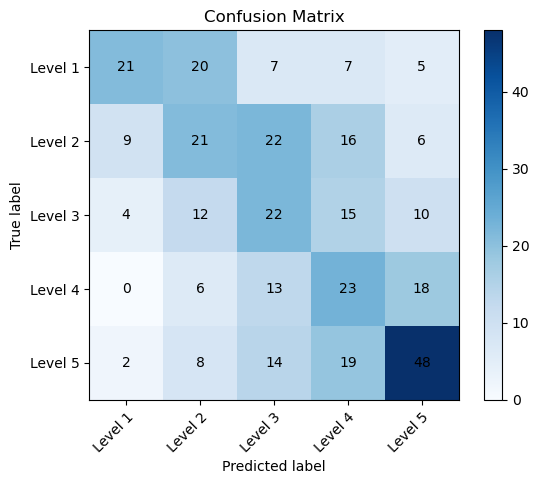

Feature Importance Rankings:
1. no_of_variables: 8.342376095311216
2. NOUN: 6.723728553360278
3. large_words_cat: 6.281219422094388
4. ADP: 6.049101525393944
5. no_of_equations: 5.868773229679203
6. ADJ: 5.371496818217367
7. VERB: 5.292560182457361
8. DET: 5.240047954034226
9. has_symbol: 4.569321721767996
10. PUNCT: 4.45604387600794
11. word_count_cat: 4.302244443983898
12. AUX: 4.290278694032441
13. words_per_sentence_cat: 3.413287149042795
14. PRON: 3.1566205303203887
15. CCONJ: 3.0849627696194295
16. has_pow: 2.899713623993
17. SCONJ: 2.8624559907018066
18. average_word_length_cat: 2.702780482830212
19. NUM: 2.4706170748007947
20. has_digits: 2.2358988951679404
21. PROPN: 1.6347355542040805
22. has_fraction: 1.535856055500024
23. sentence_count_cat: 1.3996674986988757
24. ADV: 1.3460645261448272
25. has_eq: 1.307999284652106
26. PART: 0.7732858105520888
27. has_neq: 0.7641922473721905
28. has_logarithm: 0.480876064003497
29. SYM: 0.4579244358316687
30. has_mod: 0.39775755057331363


In [297]:
scores = rf_model(data3, scores=scores, experiment="Experiment3+SMOTE")

int64
Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.3746539230709295
train_evaluation:

              precision    recall  f1-score   support

           1       0.94      0.51      0.66       263
           2       0.64      0.74      0.69       233
           3       0.65      0.74      0.69       276
           4       0.66      0.84      0.74       250
           5       0.81      0.77      0.79       366

    accuracy                           0.72      1388
   macro avg       0.74      0.72      0.71      1388
weighted avg       0.75      0.72      0.72      1388

[[133  54  47  16  13]
 [  1 172  21  24  15]
 [  2  17 204  28  25]
 [  2  10  15 210  13]
 [  4  16  26  38 282]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.56      0.32      0.41        62
           2       0.22      

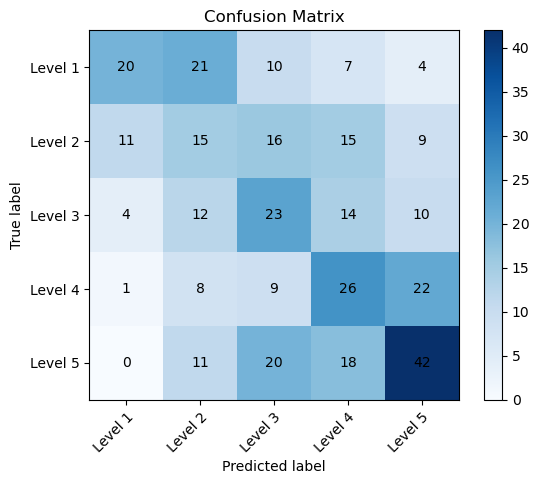

Feature Importance Rankings:
1. no_of_variables: 8.533018689176815
2. ADP: 5.944659666246931
3. VERB: 5.6210869283131935
4. ADJ: 5.482882819061179
5. word_count_cat: 5.385347629459732
6. DET: 5.272434653116716
7. no_of_equations: 5.117815579133476
8. large_words_cat: 4.925654426250956
9. NOUN: 4.876018218806951
10. PUNCT: 4.831510409839833
11. PRON: 4.2784084922417165
12. AUX: 4.168899825970715
13. has_symbol: 3.802588392529634
14. words_per_sentence_cat: 3.5110858650024417
15. CCONJ: 3.4413246122808383
16. has_pow: 2.9198332697691636
17. NUM: 2.709652844372366
18. average_word_length_cat: 2.6044142691509835
19. PROPN: 2.2216182704563883
20. ADV: 2.1929024572341858
21. SCONJ: 2.112606043843941
22. has_fraction: 1.9502582896274445
23. has_eq: 1.5869534426194758
24. PART: 1.2715677656326423
25. has_digits: 1.2228890982857101
26. sentence_count_cat: 0.9978750247767263
27. has_neq: 0.9705120336930717
28. has_mod: 0.7895272283720327
29. SYM: 0.6108592651664047
30. X: 0.35683193548858105
31.

In [298]:
scores = rf_model(data3, use_smote_technique=0, scores=scores, experiment="Experiment3")

In [299]:
data3 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_CAT_FEATURES + POS_FEATURES + MANDATORY_FEATURES + GPT_5_TARGET_FEATURE]

int64
Class distribution before SMOTE: Counter({3: 548, 2: 525, 4: 212, 1: 61, 5: 42})
Class distribution after SMOTE: Counter({2: 548, 3: 548, 4: 548, 5: 548, 1: 548})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.6295620437956204
train_evaluation:

              precision    recall  f1-score   support

           1       0.97      0.78      0.86       678
           2       0.70      0.85      0.77       454
           3       0.74      0.88      0.81       463
           4       0.86      0.86      0.86       549
           5       0.95      0.88      0.91       596

    accuracy                           0.85      2740
   macro avg       0.85      0.85      0.84      2740
weighted avg       0.86      0.85      0.85      2740

[[529  63  35  35  16]
 [  4 386  45  12   7]
 [  3  40 407  12   1]
 [  1  40  36 471   1]
 [ 11  19  25  18 523]]

test_evaluation:

          

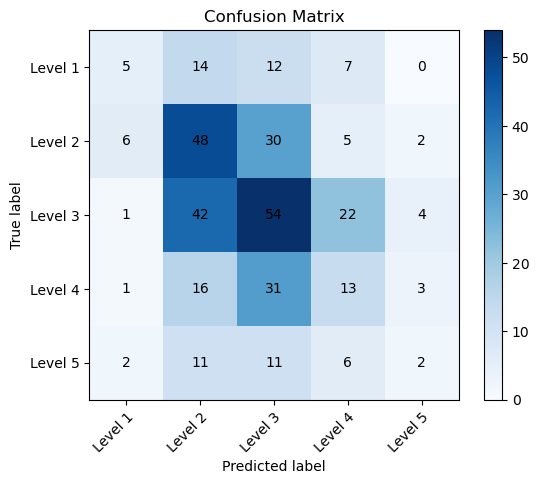

Feature Importance Rankings:
1. PUNCT: 8.302352725848497
2. no_of_variables: 7.9843661716413346
3. ADJ: 6.775144294928129
4. NOUN: 5.7302182805594
5. has_symbol: 5.38653468513872
6. DET: 5.148807886748634
7. AUX: 5.011212716368308
8. has_pow: 4.59563091892295
9. VERB: 4.494538360103892
10. large_words_cat: 4.463889380221529
11. ADP: 4.446171774060492
12. word_count_cat: 4.33548583053502
13. no_of_equations: 4.042733249126326
14. words_per_sentence_cat: 3.6977516557052845
15. average_word_length_cat: 3.089084966824145
16. PRON: 3.076511427541886
17. SCONJ: 2.88941560562295
18. NUM: 2.582518467906434
19. CCONJ: 2.410848267050827
20. PROPN: 2.2466160541988094
21. has_digits: 1.9838945129743082
22. has_fraction: 1.8626111813920079
23. ADV: 1.3062120857046942
24. has_eq: 1.1246819008010462
25. sentence_count_cat: 1.0184520077358024
26. X: 0.4273509973225839
27. PART: 0.41022901278125373
28. has_neq: 0.38199087305465396
29. has_logarithm: 0.37543845492653216
30. SYM: 0.28154288797536664
31. 

In [300]:
scores = rf_model(data3, target_feature=GPT_5_TARGET_FEATURE[0], scores=scores, experiment="Experiment3+GPT+SMOTE")

int64
Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.38760616055891745
train_evaluation:

              precision    recall  f1-score   support

           1       0.97      0.42      0.58       141
           2       0.81      0.82      0.81       517
           3       0.74      0.92      0.82       442
           4       0.84      0.77      0.80       231
           5       0.98      0.72      0.83        57

    accuracy                           0.80      1388
   macro avg       0.87      0.73      0.77      1388
weighted avg       0.82      0.80      0.79      1388

[[ 59  46  29   7   0]
 [  1 423  76  17   0]
 [  0  26 408   8   0]
 [  1  23  28 178   1]
 [  0   7   7   2  41]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.13      0.07      0.09        29
           2       0.47  

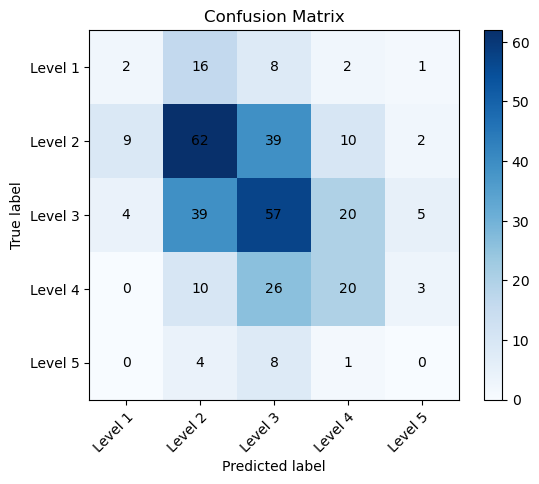

Feature Importance Rankings:
1. no_of_variables: 6.797480986833983
2. PUNCT: 6.152903499804966
3. NOUN: 6.079060265562129
4. has_pow: 5.708476504687665
5. large_words_cat: 5.400130097207339
6. ADJ: 5.166790364913668
7. DET: 5.146878122625238
8. no_of_equations: 5.005391164836757
9. AUX: 4.703038877285779
10. words_per_sentence_cat: 4.357821954964466
11. ADP: 4.240585704387936
12. VERB: 4.137518637507208
13. PRON: 4.04952976805476
14. word_count_cat: 3.3464841943493293
15. average_word_length_cat: 3.2922246646185074
16. CCONJ: 3.2523184223604917
17. SCONJ: 3.1515737665164725
18. has_fraction: 2.822833259211805
19. has_symbol: 2.6097239982775027
20. PROPN: 2.5675234804073246
21. NUM: 2.2066374444620545
22. sentence_count_cat: 1.8316696061215956
23. has_digits: 1.7364758459215868
24. has_eq: 1.6528000537080798
25. ADV: 1.4903457843532537
26. has_neq: 1.1409694009967437
27. PART: 0.7448298536698537
28. X: 0.5859807219462204
29. has_mod: 0.2677378858164477
30. SYM: 0.19840365873979157
31. h

In [301]:
scores = rf_model(data3, target_feature=GPT_5_TARGET_FEATURE[0], use_smote_technique=0, scores=scores, experiment="Experiment3+GPT")

## Experiment 4: 

Consider the following features

1. Categorised linguistic features
2. Numerical math features
3. POS features

Run Random Forest on the default 5 class classification and report the results



In [302]:
data4 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_NUM_FEATURES + POS_FEATURES + TARGET_FEATURE]

int64
Class distribution before SMOTE: Counter({5: 348, 4: 316, 3: 313, 2: 269, 1: 142})
Class distribution after SMOTE: Counter({5: 348, 4: 348, 3: 348, 1: 348, 2: 348})
Best Parameters:  {'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.4729885057471265
train_evaluation:

              precision    recall  f1-score   support

           1       0.92      0.74      0.82       430
           2       0.69      0.72      0.70       333
           3       0.65      0.71      0.68       316
           4       0.66      0.78      0.71       296
           5       0.79      0.75      0.77       365

    accuracy                           0.74      1740
   macro avg       0.74      0.74      0.74      1740
weighted avg       0.75      0.74      0.74      1740

[[320  48  33  16  13]
 [ 14 240  36  28  15]
 [  6  26 225  35  24]
 [  5  16  24 230  21]
 [  3  18  30  39 275]]

test_evaluation:

          

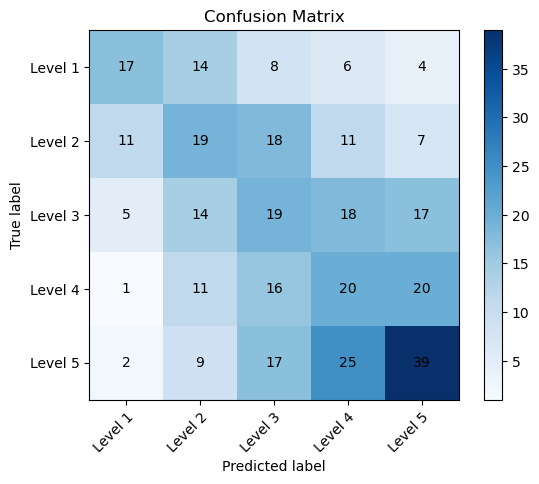

Feature Importance Rankings:
1. max_degree_of_equations: 7.207103643219191
2. symbol_count: 7.096086655014891
3. VERB: 6.4375476032482535
4. large_words_cat: 6.206261683660774
5. number_of_digits: 5.852485520800444
6. ADP: 5.493969259433014
7. ADJ: 5.191160253811196
8. DET: 4.758110361664932
9. NOUN: 4.39828138798277
10. PUNCT: 4.302354184766422
11. number_of_numbers: 4.270236599826909
12. no_of_pow: 4.066099819393449
13. word_count_cat: 3.4619113352268083
14. PRON: 3.143300397207799
15. CCONJ: 3.1376098086319164
16. AUX: 2.774824192308635
17. average_word_length_cat: 2.7057545317363982
18. words_per_sentence_cat: 2.5248342173074234
19. NUM: 2.2784925446539486
20. fracs_count: 2.2695046826189404
21. PROPN: 2.2306607045544395
22. SCONJ: 1.8873182713338779
23. ADV: 1.8033895208735848
24. eqlts_count: 1.6008822330418935
25. sentence_count_cat: 1.4344889056422252
26. PART: 0.9726091292824673
27. neqlts_count: 0.9108897084816707
28. X: 0.6131045435491334
29. log_count: 0.517112766189626
30.

In [303]:
scores = rf_model(data4, scores=scores, experiment="Experiment4+SMOTE")

int64
Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.3674570812663948
train_evaluation:

              precision    recall  f1-score   support

           1       0.95      0.59      0.73       228
           2       0.74      0.79      0.77       253
           3       0.67      0.77      0.72       273
           4       0.72      0.82      0.77       279
           5       0.85      0.83      0.84       355

    accuracy                           0.77      1388
   macro avg       0.79      0.76      0.76      1388
weighted avg       0.79      0.77      0.77      1388

[[135  32  31  18  12]
 [  1 200  22  18  12]
 [  4  18 210  28  13]
 [  2  11  22 229  15]
 [  0   8  28  23 296]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.58      0.30      0.39        71
           2       0.27   

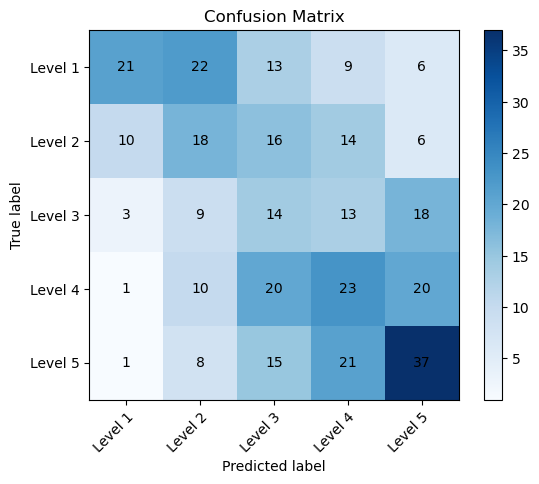

Feature Importance Rankings:
1. symbol_count: 8.100781859558094
2. large_words_cat: 7.12197624883172
3. number_of_numbers: 5.558621978817491
4. max_degree_of_equations: 5.17765314635066
5. number_of_digits: 5.0743668981076455
6. ADP: 5.071481440040613
7. VERB: 4.982095319181219
8. ADJ: 4.907322016561688
9. NOUN: 4.863485407328409
10. DET: 4.669285081635521
11. PUNCT: 4.356513358879956
12. word_count_cat: 4.343762238667788
13. no_of_pow: 4.156400466583278
14. AUX: 3.6250985908474003
15. words_per_sentence_cat: 3.2179214763456794
16. NUM: 3.0344898614544484
17. CCONJ: 2.9079750127913235
18. PRON: 2.731523180222043
19. SCONJ: 2.7201248226958703
20. average_word_length_cat: 2.6673962017872026
21. fracs_count: 1.8944522039672107
22. ADV: 1.7586619430727792
23. eqlts_count: 1.5928556847647748
24. PROPN: 1.5264102448637629
25. PART: 1.0448837635031334
26. sentence_count_cat: 0.7421790193772335
27. neqlts_count: 0.6409746525456178
28. log_count: 0.4695312399240159
29. SYM: 0.4669428112522014
3

In [304]:
scores = rf_model(data4, use_smote_technique=0, scores=scores, experiment="Experiment4")

In [305]:
data4 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_NUM_FEATURES + POS_FEATURES + GPT_5_TARGET_FEATURE]

int64
Class distribution before SMOTE: Counter({3: 548, 2: 525, 4: 212, 1: 61, 5: 42})
Class distribution after SMOTE: Counter({2: 548, 3: 548, 4: 548, 5: 548, 1: 548})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.6291970802919709
train_evaluation:

              precision    recall  f1-score   support

           1       0.98      0.76      0.86       708
           2       0.66      0.82      0.73       445
           3       0.72      0.86      0.78       463
           4       0.82      0.83      0.83       543
           5       0.95      0.90      0.92       581

    accuracy                           0.83      2740
   macro avg       0.83      0.83      0.82      2740
weighted avg       0.85      0.83      0.83      2740

[[537  73  43  40  15]
 [  5 364  55  17   4]
 [  3  40 396  23   1]
 [  2  43  40 452   6]
 [  1  28  14  16 522]]

test_evaluation:

          

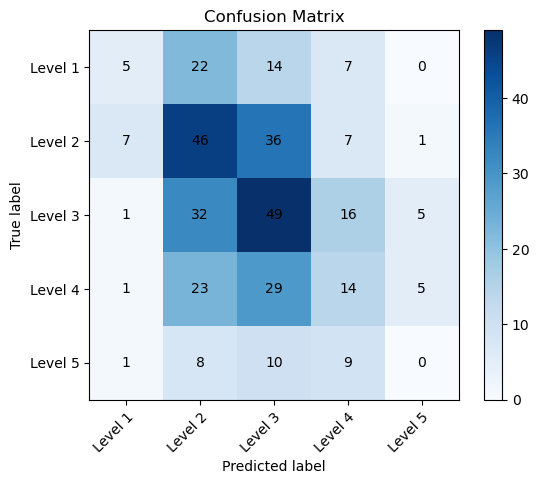

Feature Importance Rankings:
1. PUNCT: 7.425611439828221
2. no_of_pow: 7.040271374770262
3. NOUN: 6.57801964253787
4. number_of_digits: 6.2241067541573845
5. ADJ: 5.245091490122626
6. AUX: 5.232003098195459
7. DET: 4.820467642762711
8. max_degree_of_equations: 4.778716461220807
9. VERB: 4.6091547100066705
10. symbol_count: 4.469884201091723
11. large_words_cat: 4.465594532439346
12. number_of_numbers: 4.195694491709171
13. words_per_sentence_cat: 4.000702830452389
14. average_word_length_cat: 3.5784714066730077
15. PROPN: 3.172548277729019
16. ADP: 3.12955378321512
17. PRON: 2.556919393250972
18. SCONJ: 2.5491551305686797
19. word_count_cat: 2.5445040484686814
20. CCONJ: 2.341544845542902
21. fracs_count: 2.313848825178804
22. NUM: 2.2556662705390416
23. ADV: 1.3553435743829758
24. sentence_count_cat: 1.275593246912959
25. eqlts_count: 1.00242766535156
26. PART: 0.8099984063772344
27. X: 0.7087339881711265
28. neqlts_count: 0.5892624037565662
29. SYM: 0.34554779410209563
30. mod_count:

In [306]:
scores = rf_model(data4, target_feature=GPT_5_TARGET_FEATURE[0], scores=scores, experiment="Experiment4+GPT+SMOTE")

int64
Best Parameters:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.39986494558865543
train_evaluation:

              precision    recall  f1-score   support

           1       0.93      0.42      0.58       137
           2       0.74      0.78      0.76       496
           3       0.71      0.84      0.77       461
           4       0.81      0.70      0.75       244
           5       0.98      0.82      0.89        50

    accuracy                           0.75      1388
   macro avg       0.83      0.71      0.75      1388
weighted avg       0.77      0.75      0.75      1388

[[ 57  45  26   9   0]
 [  3 386  88  19   0]
 [  1  62 388  10   0]
 [  0  28  43 172   1]
 [  0   4   3   2  41]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.20      0.12      0.15        24
           2       0.42      0.46  

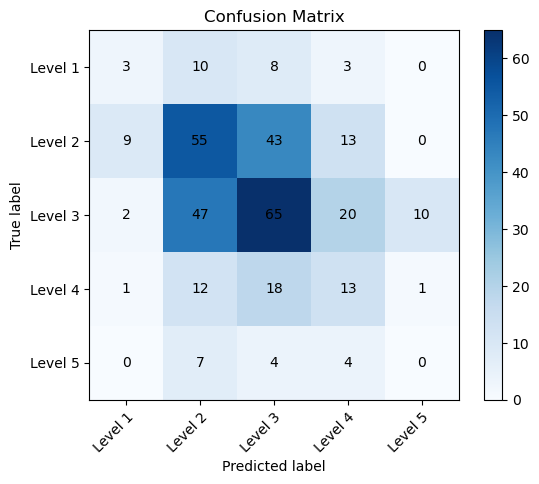

Feature Importance Rankings:
1. number_of_digits: 6.9358880252831545
2. no_of_pow: 6.617613231209636
3. DET: 6.2387376927622835
4. PUNCT: 5.520931874281889
5. large_words_cat: 5.062054040684528
6. number_of_numbers: 4.937976474630452
7. NOUN: 4.715353397012241
8. ADJ: 4.461936801130788
9. max_degree_of_equations: 4.421481182935586
10. AUX: 4.339683121095708
11. symbol_count: 4.229614043478909
12. words_per_sentence_cat: 3.8613762031682826
13. VERB: 3.8429645891927766
14. ADP: 3.8424619221931042
15. PRON: 3.658219990692334
16. word_count_cat: 3.655514044588435
17. PROPN: 3.6054624459010745
18. SCONJ: 2.6558815785085605
19. fracs_count: 2.5410816702967063
20. CCONJ: 2.526520806397491
21. ADV: 2.276981007482606
22. average_word_length_cat: 2.121243355091306
23. NUM: 1.7819456605632347
24. X: 1.512528258514838
25. sentence_count_cat: 1.3811180596403538
26. eqlts_count: 1.3325412365330394
27. PART: 0.5934043229862986
28. neqlts_count: 0.590889112048648
29. SYM: 0.3640126245327431
30. log_co

In [307]:
scores = rf_model(data4, target_feature=GPT_5_TARGET_FEATURE[0], use_smote_technique=0, scores=scores, experiment="Experiment4+GPT")

## Experiment 5

Consider the following features

1. Categorised linguistic features
2. Numerical Math features
3. POS features
4. Math vocab

In [309]:
data5 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_NUM_FEATURES + POS_FEATURES + MATH_VOCAB_FEATURES + TARGET_FEATURE]

int64
Class distribution before SMOTE: Counter({5: 348, 4: 316, 3: 313, 2: 269, 1: 142})
Class distribution after SMOTE: Counter({5: 348, 4: 348, 3: 348, 1: 348, 2: 348})
Best Parameters:  {'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.46206896551724136
train_evaluation:

              precision    recall  f1-score   support

           1       0.94      0.75      0.83       440
           2       0.74      0.83      0.78       312
           3       0.76      0.84      0.80       316
           4       0.82      0.88      0.85       325
           5       0.87      0.88      0.87       347

    accuracy                           0.83      1740
   macro avg       0.83      0.83      0.83      1740
weighted avg       0.84      0.83      0.83      1740

[[328  49  36  18   9]
 [ 12 259  21   9  11]
 [  6  19 265  15  11]
 [  1  12  13 286  13]
 [  1   9  13  20 304]]

test_evaluation:

          

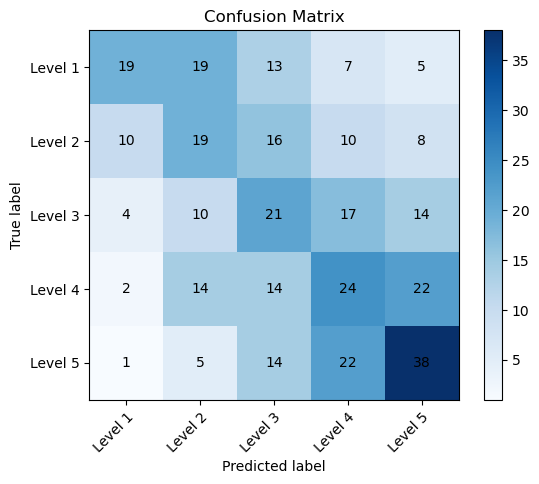

Feature Importance Rankings:
1. max_degree_of_equations: 6.028746953240445
2. VERB: 5.52630168451268
3. symbol_count: 5.252979288173743
4. ADP: 4.85193118644739
5. NOUN: 4.849897510352079
6. number_of_digits: 4.755953152905712
7. number_of_math_vocab: 4.7142692367012335
8. ADJ: 4.576848785560537
9. large_words_cat: 4.558399737522287
10. DET: 4.532239413680984
11. number_of_numbers: 4.457087578620409
12. PUNCT: 4.439742525538772
13. no_of_pow: 3.8357733126044256
14. PRON: 3.5045592881449963
15. words_per_sentence_cat: 3.4729180444767604
16. word_count_cat: 3.314521836144945
17. NUM: 3.076612199021327
18. AUX: 3.0666466579610545
19. average_word_length_cat: 2.882578467551045
20. SCONJ: 2.7348148422558505
21. CCONJ: 2.683279560051936
22. ADV: 2.452325673472889
23. eqlts_count: 2.26153924070042
24. fracs_count: 2.1031696798759434
25. PROPN: 1.6737484019298903
26. sentence_count_cat: 1.3845013124034218
27. PART: 0.8802506997168243
28. neqlts_count: 0.7020658800592166
29. log_count: 0.540956

In [310]:
scores = rf_model(data5, scores=scores, experiment="Experiment5+SMOTE")

int64
Best Parameters:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.3695789938446355
train_evaluation:

              precision    recall  f1-score   support

           1       0.96      0.59      0.73       229
           2       0.78      0.83      0.81       253
           3       0.77      0.86      0.81       281
           4       0.81      0.87      0.84       294
           5       0.88      0.92      0.90       331

    accuracy                           0.83      1388
   macro avg       0.84      0.82      0.82      1388
weighted avg       0.84      0.83      0.83      1388

[[136  33  32  17  11]
 [  4 211  17  13   8]
 [  1  12 241  15  12]
 [  1   8  17 257  11]
 [  0   5   6  14 306]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.56      0.36      0.44        55
           2       0.30      0.34   

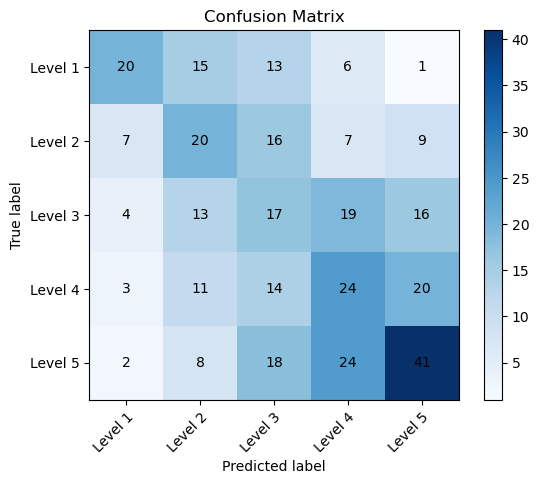

Feature Importance Rankings:
1. max_degree_of_equations: 6.950034166384356
2. symbol_count: 5.9806267757199
3. NOUN: 5.642173738627476
4. large_words_cat: 5.250294980495126
5. number_of_digits: 5.247630670972372
6. number_of_math_vocab: 4.884287518753604
7. PUNCT: 4.831197319163572
8. VERB: 4.677900707659237
9. ADP: 4.5202047709438
10. ADJ: 4.068691103229163
11. no_of_pow: 3.9929841911424706
12. word_count_cat: 3.77110379811382
13. number_of_numbers: 3.6113124914299486
14. NUM: 3.601001390487235
15. words_per_sentence_cat: 3.5582459374410713
16. AUX: 3.556033294108639
17. DET: 3.2367155794708578
18. PRON: 3.0408875144704908
19. average_word_length_cat: 2.6425821924073674
20. SCONJ: 2.521048435971196
21. CCONJ: 2.517448817517019
22. ADV: 2.2279883017580255
23. fracs_count: 2.06261561716639
24. PROPN: 1.5925437602884545
25. sentence_count_cat: 1.457139577283962
26. eqlts_count: 1.2822517436885426
27. PART: 0.9202709441971503
28. neqlts_count: 0.7582872500582152
29. X: 0.49764432209479653

In [311]:
scores = rf_model(data5, use_smote_technique=0, scores=scores, experiment="Experiment5")

In [312]:
data5 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_NUM_FEATURES + POS_FEATURES + MATH_VOCAB_FEATURES + GPT_5_TARGET_FEATURE]

int64
Class distribution before SMOTE: Counter({3: 548, 2: 525, 4: 212, 1: 61, 5: 42})
Class distribution after SMOTE: Counter({2: 548, 3: 548, 4: 548, 5: 548, 1: 548})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.6321167883211679
train_evaluation:

              precision    recall  f1-score   support

           1       0.97      0.76      0.85       702
           2       0.71      0.88      0.78       443
           3       0.76      0.85      0.80       488
           4       0.83      0.84      0.83       542
           5       0.94      0.92      0.93       565

    accuracy                           0.84      2740
   macro avg       0.84      0.85      0.84      2740
weighted avg       0.86      0.84      0.84      2740

[[532  57  40  52  21]
 [  9 388  33  12   1]
 [  2  51 416  16   3]
 [  2  31  48 455   6]
 [  3  21  11  13 517]]

test_evaluation:

          

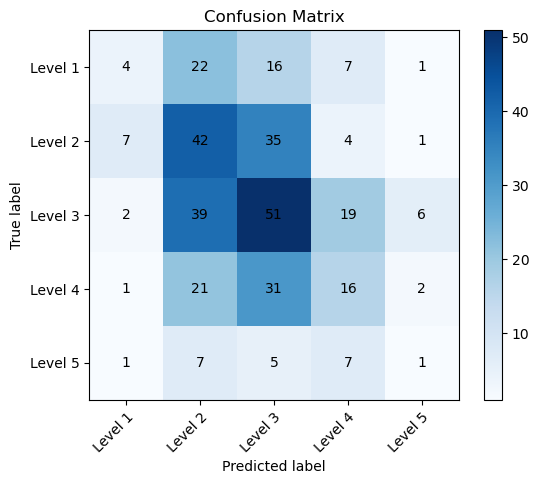

Feature Importance Rankings:
1. PUNCT: 6.572491299388093
2. NOUN: 5.888521710733083
3. number_of_digits: 5.831076586818614
4. no_of_pow: 5.508929265022509
5. ADJ: 4.924293966213308
6. AUX: 4.7580387308952705
7. number_of_numbers: 4.519761193640483
8. max_degree_of_equations: 4.408235423394112
9. symbol_count: 4.377690948649062
10. words_per_sentence_cat: 4.371704125729011
11. VERB: 4.345686424522648
12. word_count_cat: 4.310318825072668
13. large_words_cat: 4.065862767702106
14. number_of_math_vocab: 3.9761030781607496
15. DET: 3.949877690026609
16. PROPN: 3.744010527671535
17. ADP: 3.726253145461193
18. PRON: 2.8858147348143968
19. average_word_length_cat: 2.684751880849761
20. SCONJ: 2.610580033283679
21. fracs_count: 2.4340680500126934
22. NUM: 2.3056601235000462
23. CCONJ: 2.04294884297283
24. sentence_count_cat: 1.5800817747565934
25. ADV: 1.0745322548559568
26. eqlts_count: 0.8877547023326703
27. PART: 0.512803681385057
28. mod_count: 0.4504790366400873
29. X: 0.431154769951165
3

In [313]:
scores = rf_model(data5, target_feature=GPT_5_TARGET_FEATURE[0], scores=scores, experiment="Experiment5+GPT+SMOTE")

int64
Best Parameters:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.39411214710542036
train_evaluation:

              precision    recall  f1-score   support

           1       0.97      0.39      0.56       150
           2       0.75      0.81      0.78       484
           3       0.74      0.87      0.80       465
           4       0.83      0.74      0.78       238
           5       0.98      0.80      0.88        51

    accuracy                           0.78      1388
   macro avg       0.85      0.72      0.76      1388
weighted avg       0.79      0.78      0.77      1388

[[ 59  50  29  11   1]
 [  1 394  73  16   0]
 [  0  53 406   6   0]
 [  1  24  37 176   0]
 [  0   4   3   3  41]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.20      0.12      0.15        26
           2       0.47      0.50  

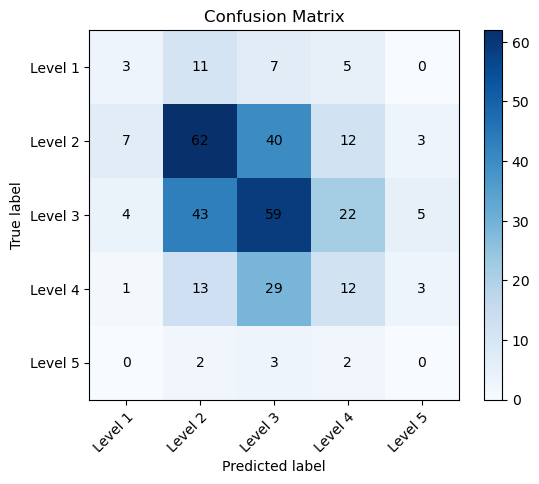

Feature Importance Rankings:
1. no_of_pow: 6.445211084592834
2. PUNCT: 6.212758693846175
3. number_of_numbers: 5.641856353965356
4. ADJ: 5.494673991933515
5. NOUN: 5.407713201026532
6. symbol_count: 5.215206034594897
7. max_degree_of_equations: 4.601730101510377
8. number_of_digits: 4.581318775217728
9. ADP: 4.304842957447823
10. AUX: 3.8990760226734817
11. large_words_cat: 3.7434852713445057
12. DET: 3.662036170234264
13. VERB: 3.6581043513889875
14. number_of_math_vocab: 3.607715516505384
15. PRON: 3.5602751842014904
16. words_per_sentence_cat: 3.3389993839236234
17. fracs_count: 3.324506612125738
18. CCONJ: 3.100309345214022
19. word_count_cat: 2.947444896735706
20. SCONJ: 2.6337972148350786
21. NUM: 2.567340091796183
22. PROPN: 2.222987212245876
23. ADV: 1.747059781778412
24. average_word_length_cat: 1.73978455843359
25. eqlts_count: 1.3807682911504793
26. sentence_count_cat: 1.2405724794845094
27. X: 1.226464560515956
28. neqlts_count: 0.9859242663650609
29. PART: 0.59241543488019

In [314]:
scores = rf_model(data5, target_feature=GPT_5_TARGET_FEATURE[0], use_smote_technique=0, scores=scores, experiment="Experiment5+GPT")

In [315]:
scores

,Model,F1_train,F1_test
0,Experiment1+SMOTE,0.654492,0.337514
1,Experiment1,0.698442,0.316425
2,Experiment1+GPT+SMOTE,0.706934,0.330942
3,Experiment1+GPT,0.704008,0.348757
4,Experiment2+SMOTE,0.696667,0.329190
5,Experiment2,0.724699,0.329146
6,Experiment2+GPT+SMOTE,0.787246,0.345721
7,Experiment2+GPT,0.744552,0.396849
8,Experiment3+SMOTE,0.802692,0.382916
9,Experiment3,0.723193,0.358629


## Experiment 6

Consider the following features
1. Math (cat/Num)
2. cohmetrix

In [317]:
def get_cohmetrix_merged_data(columns):
    cohmetrix = pd.read_csv("../Data/cohmetrix_final.csv")
    print("Shape of cohmetric features: ", cohmetrix.shape)

    math_data = math_problems[['problem'] + columns]

    print("math features shape: ", math_data.shape)

    data6 = pd.merge(cohmetrix,math_data, on='problem', how='inner')
    data6.drop(columns=['problem'], inplace=True)

    print("final dataframe shape: ", data6.shape)
    return data6

In [318]:
data6 = get_cohmetrix_merged_data(MATH_NUM_FEATURES + MANDATORY_FEATURES + TARGET_FEATURE)

Shape of cohmetric features:  (3584, 107)
math features shape:  (1736, 16)
final dataframe shape:  (1736, 121)


int64
Class distribution before SMOTE: Counter({5: 348, 4: 316, 3: 313, 2: 269, 1: 142})
Class distribution after SMOTE: Counter({5: 348, 4: 348, 3: 348, 1: 348, 2: 348})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.4764367816091954
train_evaluation:

              precision    recall  f1-score   support

           1       0.98      0.91      0.94       374
           2       0.87      0.92      0.89       332
           3       0.86      0.88      0.87       339
           4       0.84      0.91      0.87       322
           5       0.93      0.86      0.89       373

    accuracy                           0.90      1740
   macro avg       0.90      0.90      0.90      1740
weighted avg       0.90      0.90      0.90      1740

[[341  20   9   3   1]
 [  2 304   8  14   4]
 [  2  15 299  14   9]
 [  2   3  12 293  12]
 [  1   6  20  24 322]]

test_evaluation:

        

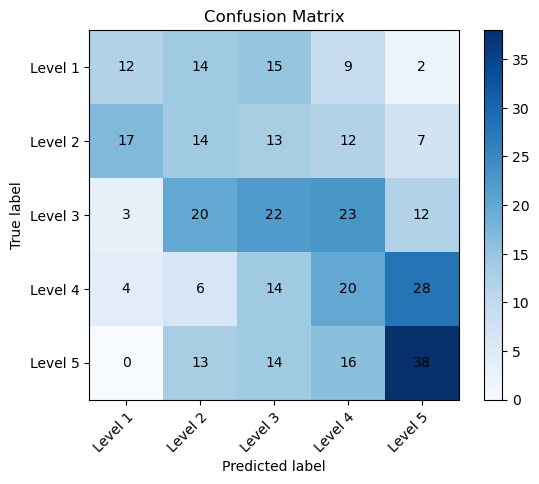

Feature Importance Rankings:
1. DESWC: 3.986208402334405
2. WRDMEAc: 2.949984081347529
3. symbol_count: 2.832270009365122
4. no_of_variables: 2.769711507547019
5. WRDADJ: 2.50517845111762
6. DESSL: 2.270309057796055
7. PCTEMPz: 2.1724813452819456
8. DESWLltd: 2.1549733479447486
9. WRDHYPn: 2.06924652397334
10. PCCONNz: 2.046375450027676
11. RDL2: 2.003831191127707
12. WRDPOLc: 1.9957373313681956
13. WRDAOAc: 1.9345899051420856
14. PCCNCz: 1.877811138823572
15. WRDPRO: 1.8531794873358396
16. CNCAll: 1.8246021950008982
17. DESWLlt: 1.7944152377074092
18. PCNARz: 1.782811798026006
19. max_degree_of_equations: 1.730459229856317
20. RDFRE: 1.6841217897930292
21. WRDFAMc: 1.665320501723785
22. PCVERBz: 1.653630690525245
23. WRDFRQmc: 1.6202910559055823
24. PCREFz: 1.6144680624972092
25. SMCAUSr: 1.602839592089838
26. WRDHYPv: 1.5964311706091632
27. no_of_pow: 1.5735369718877155
28. PCSYNp: 1.572570569010906
29. PCREFp: 1.5259690178591407
30. DESWLsy: 1.506003166723255
31. WRDHYPnv: 1.4979404

In [319]:
scores = rf_model(data6, scores=scores, experiment="Exp6(num)+SMOTE")

int64
Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.37029062670441265
train_evaluation:

              precision    recall  f1-score   support

           1       0.94      0.74      0.83       179
           2       0.78      0.75      0.76       280
           3       0.72      0.77      0.75       291
           4       0.70      0.82      0.76       270
           5       0.84      0.79      0.81       368

    accuracy                           0.78      1388
   macro avg       0.79      0.78      0.78      1388
weighted avg       0.79      0.78      0.78      1388

[[133  19  14  11   2]
 [  3 209  28  25  15]
 [  4  20 225  23  19]
 [  0   9  18 222  21]
 [  2  12  28  35 291]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.36      0.29      0.32        45
           2       0.24 

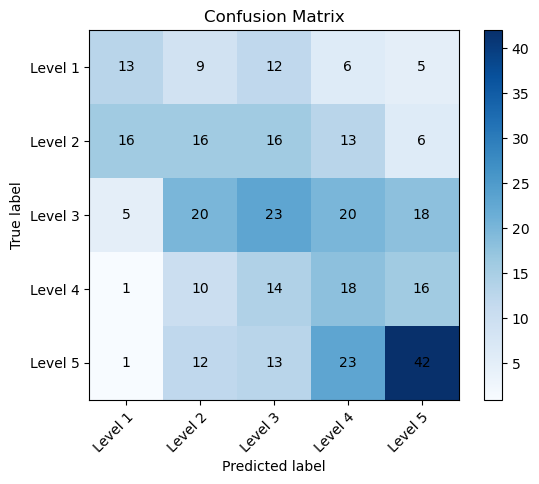

Feature Importance Rankings:
1. DESWC: 3.6776164679946244
2. symbol_count: 3.273933610890779
3. DESWLlt: 3.2169876333260046
4. DESWLltd: 2.9166781386954987
5. PCTEMPz: 2.6997881449739154
6. WRDHYPn: 2.517317276028196
7. WRDADJ: 2.4506518549616754
8. CNCAll: 2.395323590597502
9. PCSYNz: 2.3071851200516815
10. WRDMEAc: 2.188977983763954
11. RDFKGL: 2.1487579180348892
12. DESWLsyd: 2.12087445214479
13. PCDCz: 2.099144697260164
14. PCNARz: 2.0641314861502607
15. WRDIMGc: 1.9351093433893198
16. WRDPOLc: 1.9211388665094469
17. WRDPRO: 1.8885874715545572
18. no_of_variables: 1.837390201504239
19. WRDHYPv: 1.8102589989180622
20. PCCONNz: 1.7105398932415343
21. DESSL: 1.6805130888872513
22. PCVERBz: 1.6717741134546236
23. DRPP: 1.5800986710634926
24. DESWLsy: 1.5640835458138516
25. WRDCNCc: 1.54089775963494
26. WRDHYPnv: 1.5322923142185183
27. PCSYNp: 1.4951134265061778
28. RDL2: 1.4784840151918592
29. WRDAOAc: 1.4751257239019344
30. SMINTEp: 1.434124380099183
31. max_degree_of_equations: 1.407

In [320]:
scores = rf_model(data6, use_smote_technique=0, scores=scores, experiment="Exp6(num)")

In [321]:
data6 = get_cohmetrix_merged_data(MATH_NUM_FEATURES + MANDATORY_FEATURES + GPT_5_TARGET_FEATURE)

Shape of cohmetric features:  (3584, 107)
math features shape:  (1736, 16)
final dataframe shape:  (1736, 121)


int64
Class distribution before SMOTE: Counter({3: 548, 2: 525, 4: 212, 1: 61, 5: 42})
Class distribution after SMOTE: Counter({2: 548, 3: 548, 4: 548, 5: 548, 1: 548})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.6850364963503649
train_evaluation:

              precision    recall  f1-score   support

           1       1.00      0.92      0.96       593
           2       0.90      0.89      0.89       552
           3       0.87      0.92      0.89       518
           4       0.91      0.96      0.93       519
           5       0.99      0.98      0.99       558

    accuracy                           0.93      2740
   macro avg       0.93      0.93      0.93      2740
weighted avg       0.94      0.93      0.93      2740

[[547  20  15  11   0]
 [  0 491  41  18   2]
 [  1  24 477  15   1]
 [  0   9  12 498   0]
 [  0   4   3   6 545]]

test_evaluation:

          

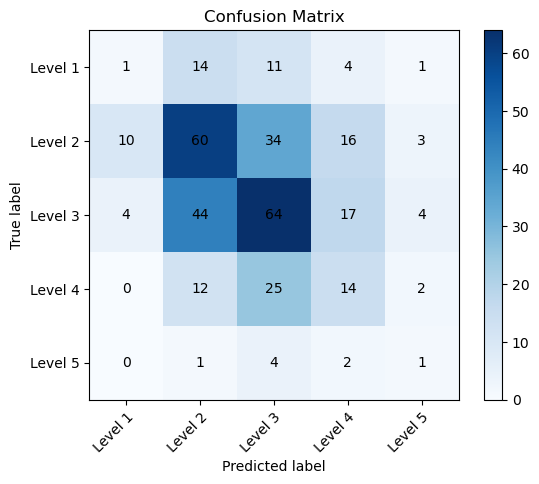

Feature Importance Rankings:
1. no_of_variables: 2.303593500417946
2. SMINTEp: 2.140592989112244
3. DESWC: 2.12367567449746
4. DESWLltd: 2.068614864753254
5. RDL2: 1.904328162194029
6. SYNLE: 1.9039003457096244
7. WRDPOLc: 1.8547285752781368
8. DESWLlt: 1.8207441168577996
9. DRAP: 1.7112611164339806
10. CNCAll: 1.7016126544772767
11. SYNMEDpos: 1.6596275352547283
12. LDMTLD: 1.645456539995715
13. WRDIMGc: 1.6345343687980747
14. PCSYNp: 1.629854220872024
15. DESSL: 1.6286649696903897
16. DRPP: 1.5933766976282282
17. PCNARz: 1.5918673717670386
18. PCCNCz: 1.5756632477222483
19. WRDPRO: 1.5732918286072823
20. PCCONNz: 1.5676508369684754
21. PCSYNz: 1.5423197368183872
22. WRDMEAc: 1.522242127450556
23. WRDFRQmc: 1.4769520449033746
24. PCREFz: 1.4684197482605732
25. LDVOCD: 1.4423655029396334
26. DRGERUND: 1.4385902252928089
27. PCCNCp: 1.4287076814274304
28. WRDCNCc: 1.4256703361265566
29. PCTEMPz: 1.4099520292702534
30. SMTEMP: 1.399319805056746
31. DESWLsyd: 1.3621385860695512
32. SMCAUS

In [322]:
scores = rf_model(data6, target_feature=GPT_5_TARGET_FEATURE[0], scores=scores, experiment="Exp6(num)+GPT+SMOTE")

int64
Best Parameters:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.4192764200192193
train_evaluation:

              precision    recall  f1-score   support

           1       0.98      0.71      0.83        84
           2       0.81      0.87      0.84       491
           3       0.85      0.87      0.86       536
           4       0.89      0.83      0.86       227
           5       0.98      0.82      0.89        50

    accuracy                           0.85      1388
   macro avg       0.90      0.82      0.86      1388
weighted avg       0.86      0.85      0.85      1388

[[ 60  12   9   3   0]
 [  1 427  50  13   0]
 [  0  65 464   6   1]
 [  0  15  23 189   0]
 [  0   6   2   1  41]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.13      0.17      0.15        12
           2       0.52      0.49   

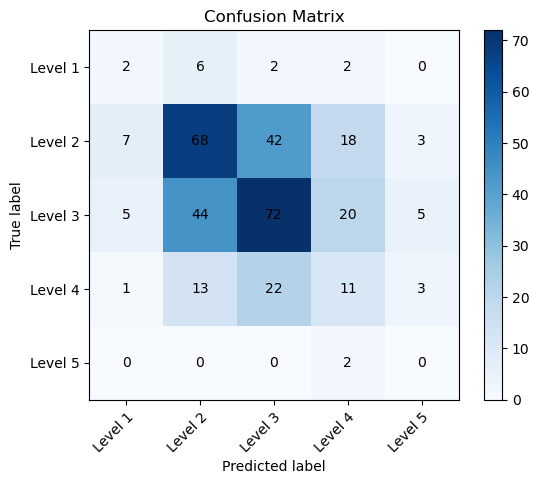

Feature Importance Rankings:
1. DESWC: 2.7316997689736984
2. DESSL: 2.5215484056660338
3. WRDADJ: 2.498395002890439
4. PCCNCz: 2.3468898000400933
5. DESWLltd: 2.34200227263713
6. DESWLsyd: 2.31200842295119
7. PCREFz: 2.2202439679991923
8. WRDFRQmc: 2.1357387489910327
9. CNCAll: 2.074620702348406
10. DRNEG: 2.031569582410645
11. WRDPRO: 1.997322743740029
12. RDL2: 1.9487478887990555
13. WRDADV: 1.931786429984875
14. PCDCz: 1.9249991580248351
15. WRDHYPv: 1.9234312031204868
16. WRDHYPnv: 1.9135528922890068
17. PCVERBz: 1.8954796909898843
18. WRDCNCc: 1.8530623486200086
19. PCREFp: 1.8326396506220914
20. DESWLlt: 1.826550479266637
21. PCCONNz: 1.8161153180649134
22. no_of_pow: 1.8015029116442483
23. SYNMEDwrd: 1.7753188621508023
24. PCNARp: 1.6884305640517558
25. WRDMEAc: 1.6405453809149508
26. WRDAOAc: 1.6394887738945387
27. WRDHYPn: 1.614873373696861
28. PCCONNp: 1.576033606058865
29. DRPP: 1.535571036208986
30. WRDPOLc: 1.5202359152694518
31. PCNARz: 1.487597533024459
32. WRDIMGc: 1.39

In [323]:
scores = rf_model(data6, target_feature=GPT_5_TARGET_FEATURE[0], use_smote_technique=0, scores=scores, experiment="Exp6(num)+GPT")

### Cohmetrix plus math cat

In [324]:
data6 = get_cohmetrix_merged_data(MATH_CAT_FEATURES + MANDATORY_FEATURES + TARGET_FEATURE)

Shape of cohmetric features:  (3584, 107)
math features shape:  (1736, 14)
final dataframe shape:  (1736, 119)


int64
Class distribution before SMOTE: Counter({5: 348, 4: 316, 3: 313, 2: 269, 1: 142})
Class distribution after SMOTE: Counter({5: 348, 4: 348, 3: 348, 1: 348, 2: 348})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.4614942528735632
train_evaluation:

              precision    recall  f1-score   support

           1       0.96      0.90      0.93       369
           2       0.88      0.89      0.88       342
           3       0.84      0.88      0.86       336
           4       0.82      0.89      0.86       320
           5       0.92      0.86      0.88       373

    accuracy                           0.88      1740
   macro avg       0.88      0.88      0.88      1740
weighted avg       0.89      0.88      0.88      1740

[[333  19   8   9   0]
 [  8 305  11  10   8]
 [  6  12 294  17   7]
 [  0   3  17 286  14]
 [  1   9  18  26 319]]

test_evaluation:

        

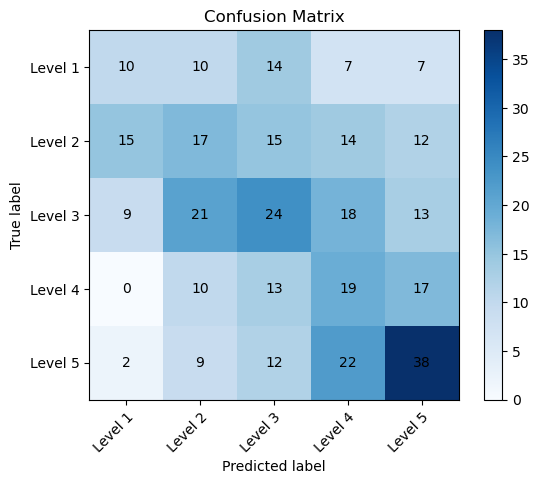

Feature Importance Rankings:
1. no_of_variables: 3.2171825379735264
2. DESWC: 3.14304165999738
3. PCTEMPz: 2.777083641376538
4. PCCNCz: 2.6488201749366804
5. WRDADJ: 2.5644357562447246
6. WRDFAMc: 2.476339847677146
7. DESWLlt: 2.4406410376668464
8. DESSL: 2.4245011836893964
9. DESWLltd: 2.4039179534405744
10. WRDMEAc: 2.3081611287403767
11. RDL2: 2.306301613158925
12. PCDCz: 2.282861965721533
13. PCCONNz: 2.0397954288497675
14. CNCAll: 1.9745595451902003
15. DRAP: 1.8765640262373693
16. WRDHYPv: 1.7939896072147565
17. no_of_equations: 1.771817596939186
18. WRDPOLc: 1.7659732981879832
19. DESWLsyd: 1.7331445505188292
20. PCREFp: 1.724376621072289
21. WRDFRQmc: 1.7016316910551628
22. WRDADV: 1.6926957601791364
23. WRDPRO: 1.6668135168244682
24. WRDHYPn: 1.646265702824035
25. PCSYNp: 1.6363067989599651
26. WRDHYPnv: 1.621878611590939
27. DRNEG: 1.5934217704342162
28. PCSYNz: 1.5829643826908248
29. PCVERBz: 1.4920861225411104
30. WRDAOAc: 1.4827274017220302
31. PCNARz: 1.474435918971326
32

In [325]:
scores = rf_model(data6, scores=scores, experiment="Exp6(cat)+SMOTE")

int64
Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.35521128223774767
train_evaluation:

              precision    recall  f1-score   support

           1       0.92      0.78      0.85       167
           2       0.83      0.80      0.81       276
           3       0.78      0.84      0.81       292
           4       0.78      0.85      0.81       288
           5       0.86      0.82      0.84       365

    accuracy                           0.82      1388
   macro avg       0.83      0.82      0.83      1388
weighted avg       0.83      0.82      0.82      1388

[[131  15  11   7   3]
 [  4 222  18  17  15]
 [  2  17 245  15  13]
 [  1   7  16 246  18]
 [  4   8  23  31 299]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.28      0.29      0.28        35
           2       0.28     

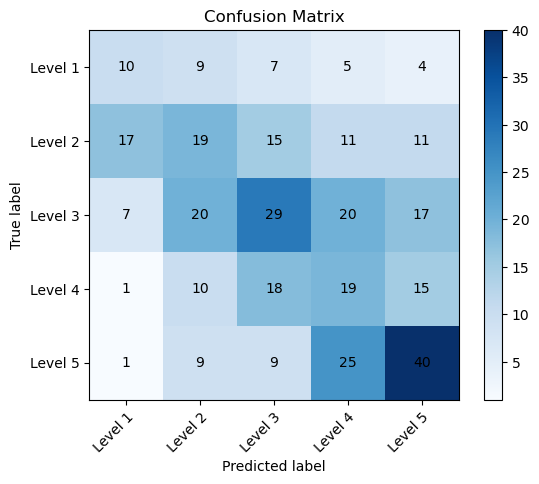

Feature Importance Rankings:
1. DESWC: 3.5602317531792105
2. CNCAll: 2.664269358203457
3. DESWLltd: 2.5375900785551537
4. DESWLlt: 2.5003094132264527
5. WRDHYPv: 2.388796155295948
6. PCCNCz: 2.3816997390046657
7. no_of_variables: 2.3562200418242925
8. RDFKGL: 2.3325471293234203
9. PCSYNz: 2.3021870188448488
10. WRDADJ: 2.2674176913421573
11. PCTEMPz: 2.264272188376053
12. RDL2: 2.1183165092394853
13. WRDAOAc: 2.0881364498055355
14. PCSYNp: 2.0810066780246648
15. PCDCz: 2.050115270778474
16. WRDPRO: 2.0328047483238345
17. RDFRE: 2.021007993034051
18. PCREFp: 2.0139388662404065
19. PCCONNp: 1.9687065293022628
20. WRDHYPn: 1.8982720591338698
21. PCREFz: 1.8245086860122957
22. PCVERBz: 1.7757006954509256
23. WRDHYPnv: 1.7264659669603666
24. PCCONNz: 1.6573593226305756
25. PCNARz: 1.6522574635761924
26. has_symbol: 1.6521317692108246
27. DRPP: 1.604734584751926
28. WRDMEAc: 1.5668699655355875
29. DRAP: 1.556663712313754
30. DESWLsy: 1.531954790867514
31. WRDPOLc: 1.5121572250581443
32. PCNA

In [326]:
scores = rf_model(data6, use_smote_technique=0, scores=scores, experiment="Exp6(cat)")

In [327]:
data6 = get_cohmetrix_merged_data(MATH_CAT_FEATURES + MANDATORY_FEATURES + GPT_5_TARGET_FEATURE)

Shape of cohmetric features:  (3584, 107)
math features shape:  (1736, 14)
final dataframe shape:  (1736, 119)


int64
Class distribution before SMOTE: Counter({3: 548, 2: 525, 4: 212, 1: 61, 5: 42})
Class distribution after SMOTE: Counter({2: 548, 3: 548, 4: 548, 5: 548, 1: 548})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.6806569343065693
train_evaluation:

              precision    recall  f1-score   support

           1       0.98      0.95      0.97       569
           2       0.87      0.82      0.85       577
           3       0.81      0.87      0.84       510
           4       0.87      0.93      0.90       512
           5       0.99      0.94      0.96       572

    accuracy                           0.90      2740
   macro avg       0.90      0.90      0.90      2740
weighted avg       0.91      0.90      0.90      2740

[[539  10  11   9   0]
 [  8 476  61  29   3]
 [  0  40 444  23   3]
 [  0  15  20 475   2]
 [  1   7  12  12 540]]

test_evaluation:

          

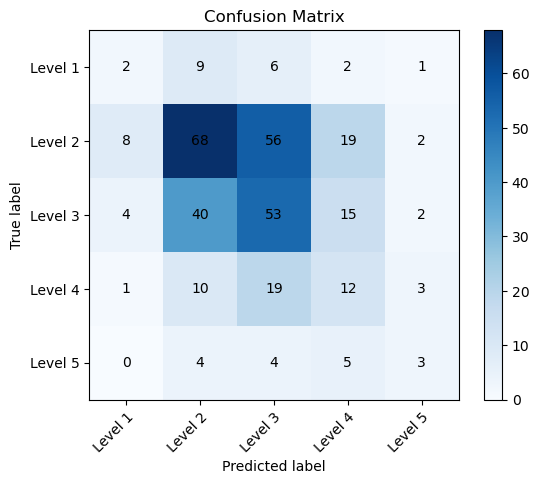

Feature Importance Rankings:
1. WRDFAMc: 2.6636343942378993
2. DESWC: 2.39801462300701
3. SYNLE: 2.361822436264675
4. has_pow: 2.294961896568686
5. CNCAll: 2.2655357755337224
6. PCCNCp: 2.128195192606267
7. DESWLltd: 2.1104812584376482
8. SMCAUSr: 2.0754366918116043
9. SMCAUSwn: 1.9478875065410388
10. DESWLlt: 1.932718430664042
11. RDL2: 1.845271140931041
12. LSASSp: 1.8319129489430528
13. PCCONNp: 1.7873518927767145
14. PCNARp: 1.739172020606396
15. no_of_variables: 1.7310947162491332
16. SMTEMP: 1.730311138661933
17. PCNARz: 1.6667257224795629
18. PCCONNz: 1.605061440750858
19. WRDADJ: 1.5959886507095418
20. WRDVERB: 1.5873574360763592
21. CRFCWOa: 1.5473797416597865
22. PCCNCz: 1.4904518488274363
23. DESSL: 1.432714387311168
24. WRDIMGc: 1.3709600245337656
25. DESWLsy: 1.3416726368497915
26. WRDHYPv: 1.3327803975284622
27. SMINTEp: 1.3210137329435243
28. CNCLogic: 1.3162501757586316
29. WRDHYPn: 1.3010380864791278
30. RDFKGL: 1.294718470452738
31. LDVOCD: 1.2793756263365017
32. WRDM

In [328]:
scores = rf_model(data6, target_feature=GPT_5_TARGET_FEATURE[0], scores=scores, experiment="Exp6(cat)+GPT+SMOTE")

int64
Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.41282757187751606
train_evaluation:

              precision    recall  f1-score   support

           1       0.98      0.62      0.76        97
           2       0.76      0.80      0.78       500
           3       0.74      0.83      0.78       490
           4       0.86      0.75      0.80       244
           5       1.00      0.74      0.85        57

    accuracy                           0.79      1388
   macro avg       0.87      0.75      0.79      1388
weighted avg       0.80      0.79      0.79      1388

[[ 60  23  11   3   0]
 [  0 401  84  15   0]
 [  1  72 407  10   0]
 [  0  22  40 182   0]
 [  0   7   6   2  42]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.13      0.12      0.13        16
           2       0.54 

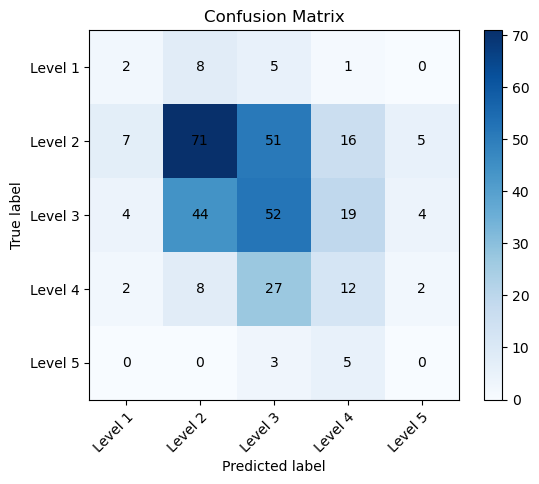

Feature Importance Rankings:
1. DESWLltd: 4.181179952005554
2. CNCAll: 2.593252495548076
3. RDFRE: 2.430082831548919
4. DRPP: 2.3236686660262014
5. WRDIMGc: 2.237614244010373
6. DRNEG: 2.174831233366304
7. RDL2: 2.084917022483049
8. PCCONNz: 2.081145713918681
9. SMCAUSr: 2.0113403689611715
10. DESSL: 2.006354674594213
11. PCREFz: 2.0058793128360253
12. WRDHYPnv: 1.984512182272825
13. WRDADV: 1.9796298556502432
14. PCSYNz: 1.903894598745469
15. WRDHYPv: 1.9003759710500607
16. DESWLsyd: 1.8872629967150705
17. DESWC: 1.8659030820123674
18. DESWLlt: 1.8295082570998378
19. PCNARz: 1.7845705585254907
20. WRDADJ: 1.7703815024021625
21. PCNARp: 1.730259380569071
22. PCDCz: 1.7251557054693147
23. DESWLsy: 1.675780789423631
24. SMTEMP: 1.6322797820833308
25. LDVOCD: 1.596993380612656
26. DRAP: 1.5553245663329451
27. RDFKGL: 1.521152316891573
28. PCSYNp: 1.5168126132175597
29. LSASSp: 1.5157878684433033
30. PCCNCz: 1.4785361956491292
31. PCTEMPz: 1.4572304384480388
32. WRDFRQmc: 1.395396787300321

In [329]:
scores = rf_model(data6, target_feature=GPT_5_TARGET_FEATURE[0], use_smote_technique=0, scores=scores, experiment="Exp6(cat)+GPT")

### Math cat + num features

In [330]:
data6 = get_cohmetrix_merged_data(MATH_CAT_FEATURES + MATH_NUM_FEATURES + MANDATORY_FEATURES + TARGET_FEATURE)

Shape of cohmetric features:  (3584, 107)
math features shape:  (1736, 25)
final dataframe shape:  (1736, 130)


int64
Class distribution before SMOTE: Counter({5: 348, 4: 316, 3: 313, 2: 269, 1: 142})
Class distribution after SMOTE: Counter({5: 348, 4: 348, 3: 348, 1: 348, 2: 348})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.4660919540229885
train_evaluation:

              precision    recall  f1-score   support

           1       0.97      0.91      0.94       372
           2       0.87      0.92      0.89       327
           3       0.87      0.88      0.88       344
           4       0.88      0.93      0.90       328
           5       0.96      0.91      0.93       369

    accuracy                           0.91      1740
   macro avg       0.91      0.91      0.91      1740
weighted avg       0.91      0.91      0.91      1740

[[339  20   8   3   2]
 [  1 302  13   9   2]
 [  7  16 303  15   3]
 [  1   3  12 305   7]
 [  0   7  12  16 334]]

test_evaluation:

        

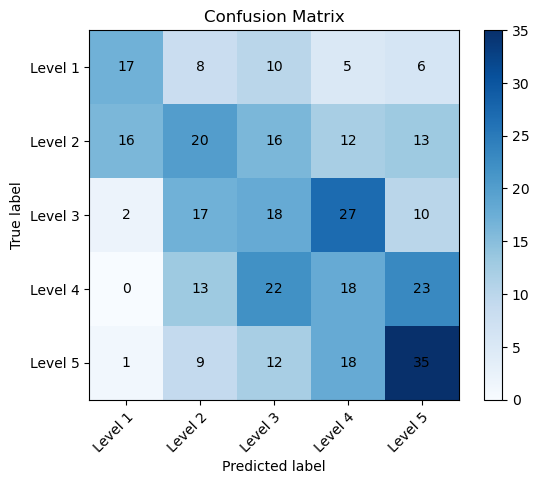

Feature Importance Rankings:
1. DESWC: 3.8967069328780064
2. no_of_variables: 2.8504388700747008
3. WRDIMGc: 2.5862586238219785
4. WRDADJ: 2.4761500526003077
5. WRDMEAc: 2.2288459871041773
6. symbol_count: 2.207072370584544
7. RDL2: 2.2060408335230566
8. DESSL: 2.168212025528286
9. WRDFAMc: 2.1627626323913707
10. PCSYNz: 2.0953164276980365
11. DESWLlt: 1.9359329787733068
12. DESWLsy: 1.87795545054855
13. PCCONNz: 1.8413250116994375
14. PCCNCz: 1.8275779359237532
15. DESWLltd: 1.8097307711511361
16. PCSYNp: 1.7351125749121326
17. PCTEMPz: 1.697263892288425
18. CNCAll: 1.6882964692682239
19. max_degree_of_equations: 1.6771673587990767
20. WRDHYPv: 1.6758417894957796
21. RDFKGL: 1.6193310411825697
22. WRDAOAc: 1.6113449979517767
23. SYNMEDwrd: 1.6039362793567158
24. PCDCz: 1.5988688373560236
25. RDFRE: 1.5911063083505212
26. PCNARz: 1.5641073122908804
27. DRNEG: 1.4807064150551759
28. LDVOCD: 1.4799374844196094
29. WRDHYPn: 1.4677186736967107
30. PCREFz: 1.4479966409848628
31. PCREFp: 1.4

In [331]:
scores = rf_model(data6, scores=scores, experiment="Exp(cat+num)+SMOTE")

int64
Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.36813235332311767
train_evaluation:

              precision    recall  f1-score   support

           1       0.97      0.88      0.93       156
           2       0.90      0.91      0.90       265
           3       0.88      0.90      0.89       307
           4       0.88      0.92      0.90       302
           5       0.92      0.90      0.91       358

    accuracy                           0.90      1388
   macro avg       0.91      0.90      0.91      1388
weighted avg       0.90      0.90      0.90      1388

[[138   9   7   0   2]
 [  3 241   7  10   4]
 [  1  11 277   6  12]
 [  0   6  10 277   9]
 [  0   2  12  23 321]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.56      0.42      0.48        48
           2       0.19  

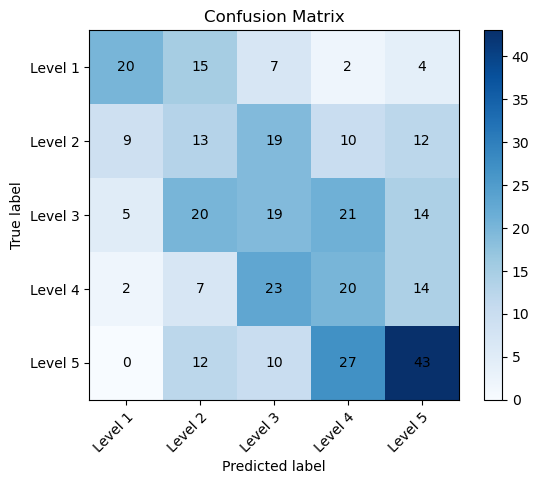

Feature Importance Rankings:
1. DESWC: 3.563785073117719
2. DESWLlt: 2.9943321662105795
3. WRDHYPv: 2.583285366993186
4. PCSYNz: 2.3923688009968727
5. PCCNCz: 2.2160917952840546
6. WRDIMGc: 2.106176777992081
7. DESWLltd: 2.098876572078927
8. symbol_count: 2.080378673650009
9. PCVERBz: 2.0328365221616482
10. no_of_variables: 2.010249178025738
11. max_degree_of_equations: 1.996195179010953
12. WRDAOAc: 1.9445802266036074
13. PCSYNp: 1.9115059838302295
14. WRDHYPnv: 1.8519848203712448
15. CNCAll: 1.8490394203714695
16. PCREFz: 1.8428720464895951
17. LDVOCD: 1.8374062576822507
18. WRDFRQmc: 1.808390922192645
19. WRDPOLc: 1.793876445608562
20. DESWLsyd: 1.7883032251212214
21. WRDADJ: 1.7127972784624568
22. PCDCz: 1.689310518816584
23. RDL2: 1.6888051943305968
24. DESWLsy: 1.6746003452240865
25. DRAP: 1.655908745937976
26. PCTEMPz: 1.6139405376687794
27. number_of_digits: 1.6083048343094695
28. PCNARp: 1.5691150348929168
29. WRDPRO: 1.5638413870152374
30. DESSL: 1.5448209080609483
31. PCCONN

In [332]:
scores = rf_model(data6, use_smote_technique=0, scores=scores, experiment="Exp6(cat+num)")

In [333]:
data6 = get_cohmetrix_merged_data(MATH_CAT_FEATURES + MATH_NUM_FEATURES + MANDATORY_FEATURES + GPT_5_TARGET_FEATURE)

Shape of cohmetric features:  (3584, 107)
math features shape:  (1736, 25)
final dataframe shape:  (1736, 130)


int64
Class distribution before SMOTE: Counter({3: 548, 2: 525, 4: 212, 1: 61, 5: 42})
Class distribution after SMOTE: Counter({2: 548, 3: 548, 4: 548, 5: 548, 1: 548})
Best Parameters:  {'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.67992700729927
train_evaluation:

              precision    recall  f1-score   support

           1       0.99      0.93      0.96       585
           2       0.85      0.86      0.85       545
           3       0.86      0.86      0.86       548
           4       0.88      0.95      0.92       508
           5       0.99      0.98      0.98       554

    accuracy                           0.92      2740
   macro avg       0.92      0.92      0.92      2740
weighted avg       0.92      0.92      0.92      2740

[[544  20  12   9   0]
 [  4 466  46  24   5]
 [  0  46 474  27   1]
 [  0  12  12 484   0]
 [  0   4   4   4 542]]

test_evaluation:

              p

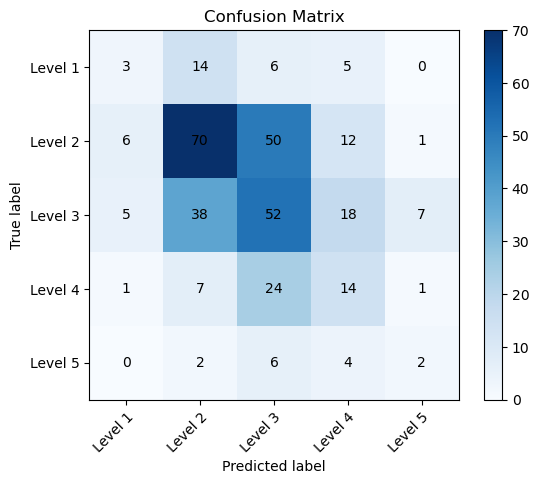

Feature Importance Rankings:
1. SMINTEr: 2.3568233435378843
2. DESWC: 2.258145641500584
3. DESSL: 2.2264559132955606
4. RDL2: 1.9267790755405634
5. WRDFAMc: 1.8630323567736466
6. WRDPRO: 1.835180700629135
7. DESWLltd: 1.800416516928736
8. DESWLsy: 1.7603166829178476
9. CNCLogic: 1.7352860052997163
10. PCSYNp: 1.713599293804096
11. has_pow: 1.6564390910450737
12. PCCNCz: 1.6508979681083034
13. PCSYNz: 1.6320229498887193
14. PCDCz: 1.6152550295594366
15. SMCAUSwn: 1.5533599632227
16. SMTEMP: 1.5440199997591502
17. no_of_variables: 1.5230190793663567
18. SMCAUSr: 1.4734240843103061
19. DRAP: 1.470873830621296
20. RDFRE: 1.443268344143444
21. PCNARz: 1.4420993695341908
22. WRDVERB: 1.4211653702591314
23. SMINTEp: 1.3669399442304675
24. PCCONNz: 1.3664712124041614
25. PCNARp: 1.353889942299985
26. PCTEMPz: 1.3510809175639
27. LSAGN: 1.3437695876383906
28. WRDHYPn: 1.31364996439164
29. WRDCNCc: 1.3123335195035104
30. LDVOCD: 1.3081209907176787
31. PCREFz: 1.2862830183431684
32. RDFKGL: 1.285

In [334]:
scores = rf_model(data6, target_feature=GPT_5_TARGET_FEATURE[0], scores=scores, experiment="Exp6(cat+num)+GPT+SMOTE")

int64
Best Parameters:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.4243513492455134
train_evaluation:

              precision    recall  f1-score   support

           1       0.97      0.73      0.83        81
           2       0.84      0.85      0.85       514
           3       0.84      0.87      0.86       525
           4       0.91      0.88      0.89       219
           5       0.98      0.84      0.90        49

    accuracy                           0.86      1388
   macro avg       0.90      0.83      0.86      1388
weighted avg       0.86      0.86      0.86      1388

[[ 59  14   6   2   0]
 [  1 439  63  11   0]
 [  1  58 459   6   1]
 [  0  10  17 192   0]
 [  0   4   3   1  41]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.13      0.18      0.15        11
           2       0.52      0.49   

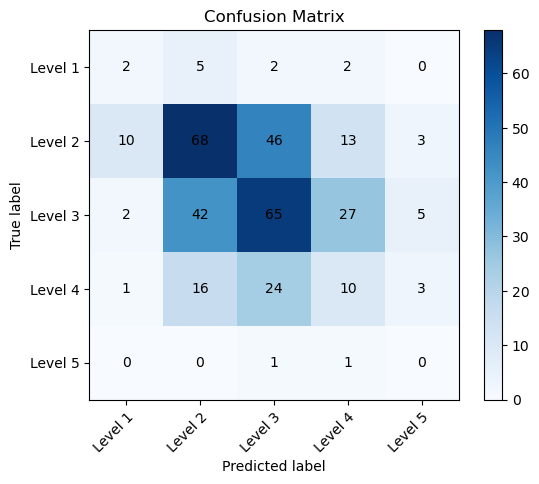

Feature Importance Rankings:
1. DESWLlt: 3.423041129553739
2. DESWLltd: 2.8381916932836457
3. PCREFz: 2.4827495271809927
4. DESWC: 2.3724572749845247
5. RDL2: 2.363461378669364
6. WRDADJ: 2.3237533569991884
7. PCCONNp: 2.1295872161523834
8. WRDAOAc: 2.11207765855836
9. SMTEMP: 2.0031006736143606
10. PCREFp: 2.000784921783792
11. WRDIMGc: 1.9013154027199979
12. WRDHYPv: 1.8733083122210785
13. SYNMEDwrd: 1.8219154176645274
14. WRDHYPn: 1.8008247901887813
15. PCTEMPz: 1.7707153857676017
16. DRNEG: 1.674293711826514
17. DRPP: 1.660311149043651
18. WRDHYPnv: 1.6410487798565514
19. PCNARz: 1.5864461327030333
20. DESWLsy: 1.5488732483629575
21. PCCNCp: 1.5375341045908142
22. DRAP: 1.5365594689548219
23. PCVERBz: 1.535760379075312
24. WRDMEAc: 1.5052653701126786
25. DESSL: 1.496289608821052
26. WRDPRO: 1.437927253472421
27. WRDPOLc: 1.4186529781526116
28. DESWLsyd: 1.3974001479205713
29. WRDFRQmc: 1.3916087671790114
30. PCCONNz: 1.3873441089892224
31. PCDCz: 1.359157294167255
32. PCSYNp: 1.352

In [335]:
scores = rf_model(data6, target_feature=GPT_5_TARGET_FEATURE[0], use_smote_technique=0, scores=scores, experiment="Exp6(cat+num)+GPT")

## Experiment 7: 

Heuristics based approach on math features

In [336]:
heuristics = {
    'no_of_exps' : 3,
    'mod_count' : 2,
    'log_count' : 3,
    'fracs_count' : 2,
    'eqlts_count' : 1,
    'neqlts_count' : 2,
    'max_degree_of_equations' : 1,
    'number_of_digits' : 1,
    'number_of_numbers' : 1,
    'no_of_equations' : 2,
    'no_of_variables' : 2
}

In [337]:
data7 = get_cohmetrix_merged_data(MATH_CAT_FEATURES + MATH_NUM_FEATURES + MANDATORY_FEATURES + TARGET_FEATURE)

Shape of cohmetric features:  (3584, 107)
math features shape:  (1736, 25)
final dataframe shape:  (1736, 130)


In [338]:
for col,weight in heuristics.items():
    data7[col] = data7[col] * weight

int64
Class distribution before SMOTE: Counter({5: 348, 4: 316, 3: 313, 2: 269, 1: 142})
Class distribution after SMOTE: Counter({5: 348, 4: 348, 3: 348, 1: 348, 2: 348})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.46321839080459765
train_evaluation:

              precision    recall  f1-score   support

           1       0.97      0.91      0.94       371
           2       0.89      0.93      0.91       332
           3       0.88      0.91      0.89       334
           4       0.88      0.91      0.90       335
           5       0.95      0.90      0.92       368

    accuracy                           0.91      1740
   macro avg       0.91      0.91      0.91      1740
weighted avg       0.92      0.91      0.91      1740

[[339  19   8   5   0]
 [  3 309   9   7   4]
 [  3   9 305  11   6]
 [  2   7  13 306   7]
 [  1   4  13  19 331]]

test_evaluation:

       

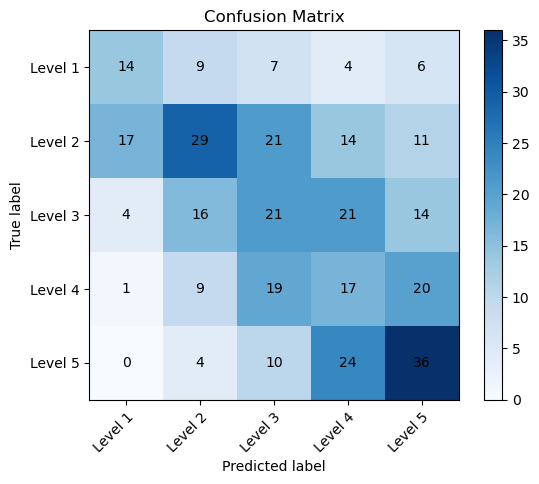

Feature Importance Rankings:
1. DESWC: 3.286423405715199
2. DESSL: 2.5357493948773007
3. no_of_variables: 2.437540165563905
4. symbol_count: 2.4116604380583273
5. WRDADJ: 2.4058373017051644
6. PCTEMPz: 2.301623980580158
7. CNCAll: 2.2165755707536556
8. WRDIMGc: 2.1692960378345374
9. DESWLltd: 2.1059368283132107
10. max_degree_of_equations: 2.070999900231827
11. DESWLlt: 2.017549343734763
12. RDFKGL: 1.9994435349288802
13. RDL2: 1.9712077399004948
14. WRDPRO: 1.936795508406069
15. PCCNCz: 1.9019736751015224
16. PCSYNz: 1.8707492646018384
17. DESWLsyd: 1.8233914406471659
18. PCREFp: 1.793735638371775
19. WRDFAMc: 1.7582839122886293
20. LDVOCD: 1.7256054777711674
21. WRDHYPv: 1.7111282255214528
22. WRDMEAc: 1.6709631079264955
23. PCCONNz: 1.662237841981726
24. PCVERBz: 1.6571620469410193
25. PCDCz: 1.6365102258535429
26. PCCONNp: 1.6190521991905067
27. WRDAOAc: 1.618356029136142
28. PCREFz: 1.6035507189822655
29. DRAP: 1.5745502038125172
30. WRDADV: 1.5372823583308046
31. WRDHYPn: 1.53354

In [340]:
scores = rf_model(data7, scores=scores, experiment="Heuristics+SMOTE")

int64
Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.36813235332311767
train_evaluation:

              precision    recall  f1-score   support

           1       0.97      0.88      0.93       156
           2       0.90      0.91      0.90       265
           3       0.88      0.90      0.89       307
           4       0.88      0.92      0.90       302
           5       0.92      0.90      0.91       358

    accuracy                           0.90      1388
   macro avg       0.91      0.90      0.91      1388
weighted avg       0.90      0.90      0.90      1388

[[138   9   7   0   2]
 [  3 241   7  10   4]
 [  1  11 277   6  12]
 [  0   6  10 277   9]
 [  0   2  12  23 321]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.56      0.42      0.48        48
           2       0.19  

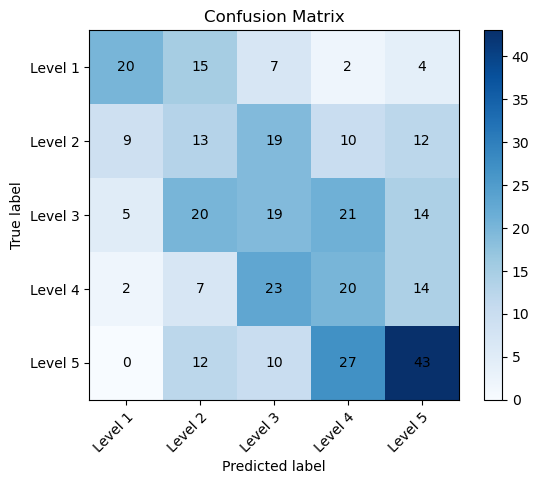

Feature Importance Rankings:
1. DESWC: 3.563785073117719
2. DESWLlt: 2.9943321662105795
3. WRDHYPv: 2.583285366993186
4. PCSYNz: 2.3923688009968727
5. PCCNCz: 2.2160917952840546
6. WRDIMGc: 2.106176777992081
7. DESWLltd: 2.098876572078927
8. symbol_count: 2.080378673650009
9. PCVERBz: 2.0328365221616482
10. no_of_variables: 2.010249178025738
11. max_degree_of_equations: 1.996195179010953
12. WRDAOAc: 1.9445802266036074
13. PCSYNp: 1.9115059838302295
14. WRDHYPnv: 1.8519848203712448
15. CNCAll: 1.8490394203714695
16. PCREFz: 1.8428720464895951
17. LDVOCD: 1.8374062576822507
18. WRDFRQmc: 1.808390922192645
19. WRDPOLc: 1.793876445608562
20. DESWLsyd: 1.7883032251212214
21. WRDADJ: 1.7127972784624568
22. PCDCz: 1.689310518816584
23. RDL2: 1.6888051943305968
24. DESWLsy: 1.6746003452240865
25. DRAP: 1.655908745937976
26. PCTEMPz: 1.6139405376687794
27. number_of_digits: 1.6083048343094695
28. PCNARp: 1.5691150348929168
29. WRDPRO: 1.5638413870152374
30. DESSL: 1.5448209080609483
31. PCCONN

In [341]:
scores = rf_model(data7, use_smote_technique=0, scores=scores, experiment="Heuristics")

In [342]:
data7 = get_cohmetrix_merged_data(MATH_CAT_FEATURES + MATH_NUM_FEATURES + MANDATORY_FEATURES + GPT_5_TARGET_FEATURE)
for col,weight in heuristics.items():
    data7[col] = data7[col] * weight

Shape of cohmetric features:  (3584, 107)
math features shape:  (1736, 25)
final dataframe shape:  (1736, 130)


int64
Class distribution before SMOTE: Counter({3: 548, 2: 525, 4: 212, 1: 61, 5: 42})
Class distribution after SMOTE: Counter({2: 548, 3: 548, 4: 548, 5: 548, 1: 548})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.6817518248175183
train_evaluation:

              precision    recall  f1-score   support

           1       0.99      0.94      0.96       582
           2       0.89      0.88      0.89       553
           3       0.86      0.91      0.89       518
           4       0.91      0.94      0.92       527
           5       0.99      0.97      0.98       560

    accuracy                           0.93      2740
   macro avg       0.93      0.93      0.93      2740
weighted avg       0.93      0.93      0.93      2740

[[545  12  14  11   0]
 [  1 488  44  16   4]
 [  0  33 472  11   2]
 [  2  12  15 497   1]
 [  0   3   3  13 541]]

test_evaluation:

          

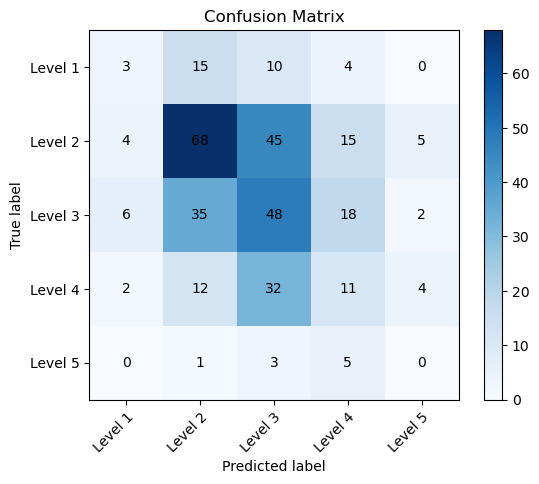

Feature Importance Rankings:
1. SYNLE: 2.6475371106270478
2. has_pow: 2.4849692141052837
3. RDL2: 2.477583849757126
4. no_of_variables: 2.360302913029084
5. SMINTEr: 2.0863543062555676
6. PCCNCp: 2.0211789218372194
7. DESWC: 1.9458159369416015
8. DESWLlt: 1.9000756903993727
9. LDVOCD: 1.8422564904057914
10. WRDHYPv: 1.8002158143751759
11. SMTEMP: 1.793051668163911
12. LSAGN: 1.7895813503473028
13. WRDFAMc: 1.7693111900468133
14. WRDPRO: 1.7623713767299605
15. WRDPOLc: 1.7372097199781593
16. PCNARp: 1.7076440765541712
17. DESSL: 1.6099227485021648
18. PCCONNp: 1.5934836353218806
19. WRDHYPnv: 1.5670559126610417
20. WRDPRP3p: 1.5388848765136158
21. WRDMEAc: 1.4974769010124651
22. PCCNCz: 1.4973368412435337
23. DRNEG: 1.472136960848981
24. LDMTLD: 1.4616618376913324
25. DRPP: 1.4010586667710914
26. PCDCp: 1.376677003899716
27. PCSYNp: 1.373098247200285
28. DESWLltd: 1.3397823300653313
29. no_of_pow: 1.2926399323026005
30. SMCAUSwn: 1.275642776152102
31. PCTEMPz: 1.266476640722154
32. PCCO

In [343]:
scores = rf_model(data7, target_feature=GPT_5_TARGET_FEATURE[0], scores=scores, experiment="Heuristics+GPT+SMOTE")

int64
Best Parameters:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 15, 'oob_score': True}
Best Score:  0.4243513492455134
train_evaluation:

              precision    recall  f1-score   support

           1       0.97      0.73      0.83        81
           2       0.84      0.85      0.85       514
           3       0.84      0.87      0.86       525
           4       0.91      0.88      0.89       219
           5       0.98      0.84      0.90        49

    accuracy                           0.86      1388
   macro avg       0.90      0.83      0.86      1388
weighted avg       0.86      0.86      0.86      1388

[[ 59  14   6   2   0]
 [  1 439  63  11   0]
 [  1  58 459   6   1]
 [  0  10  17 192   0]
 [  0   4   3   1  41]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.13      0.18      0.15        11
           2       0.52      0.49   

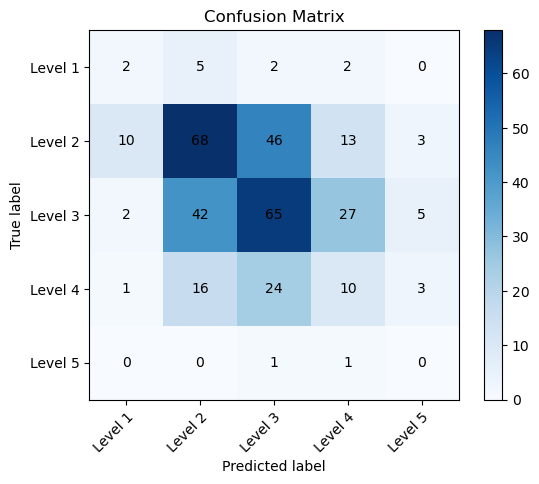

Feature Importance Rankings:
1. DESWLlt: 3.423041129553739
2. DESWLltd: 2.8381916932836457
3. PCREFz: 2.4827495271809927
4. DESWC: 2.3724572749845247
5. RDL2: 2.363461378669364
6. WRDADJ: 2.3237533569991884
7. PCCONNp: 2.1295872161523834
8. WRDAOAc: 2.11207765855836
9. SMTEMP: 2.0031006736143606
10. PCREFp: 2.000784921783792
11. WRDIMGc: 1.9013154027199979
12. WRDHYPv: 1.8733083122210785
13. SYNMEDwrd: 1.8219154176645274
14. WRDHYPn: 1.8008247901887813
15. PCTEMPz: 1.7707153857676017
16. DRNEG: 1.674293711826514
17. DRPP: 1.660311149043651
18. WRDHYPnv: 1.6410487798565514
19. PCNARz: 1.5864461327030333
20. DESWLsy: 1.5488732483629575
21. PCCNCp: 1.5375341045908142
22. DRAP: 1.5365594689548219
23. PCVERBz: 1.535760379075312
24. WRDMEAc: 1.5052653701126786
25. DESSL: 1.496289608821052
26. WRDPRO: 1.437927253472421
27. WRDPOLc: 1.4186529781526116
28. DESWLsyd: 1.3974001479205713
29. WRDFRQmc: 1.3916087671790114
30. PCCONNz: 1.3873441089892224
31. PCDCz: 1.359157294167255
32. PCSYNp: 1.352

In [344]:
scores = rf_model(data7, target_feature=GPT_5_TARGET_FEATURE[0], use_smote_technique=0, scores=scores, experiment="Heuristics+GPT")

In [345]:
scores

,Model,F1_train,F1_test
0,Experiment1+SMOTE,0.654492,0.337514
1,Experiment1,0.698442,0.316425
2,Experiment1+GPT+SMOTE,0.706934,0.330942
3,Experiment1+GPT,0.704008,0.348757
4,Experiment2+SMOTE,0.696667,0.329190
5,Experiment2,0.724699,0.329146
6,Experiment2+GPT+SMOTE,0.787246,0.345721
7,Experiment2+GPT,0.744552,0.396849
8,Experiment3+SMOTE,0.802692,0.382916
9,Experiment3,0.723193,0.358629


In [346]:
scores.to_csv("../Results/GT_GPT_Comparision_Algebra.csv", index=False)